In [352]:
# upgrade all
#----------------------------------
!python -m pip install --upgrade pip
#!python install pandas--upgrade 
#!python install numpy--upgrade 
#!python install seaborn--upgrade 
#!python --version
#----------------------------------
# Install NLTK toolkit
!pip install nltk
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install wordcloud

     ---------------------------------------- 12.8/12.8 MB 5.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [353]:
## All imports (packages, libraries, etc.)
#==============================================

## All purpose library
import numpy as np
import pandas as pd

#----------------------------------
## Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import re

#-----------------------------------
## NLP library
#!pip install gensim
#!pip install pattern
#------------
import re
import string
import nltk 
# nltk.download()
import spacy

#------------
from nltk.tokenize import RegexpTokenizer  
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from gensim import models, corpora
from nltk.stem import WordNetLemmatizer
#------------
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from sklearn.metrics import f1_score
import pickle
#-----------------------------------
## Cloudword
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#----------------------------------
## Ignoring Warning during trainings 
import warnings
warnings.filterwarnings('ignore')
#----------------------------------
# library for Count Words
from collections import Counter

## TASK 1 - Bag of words model

You will build a bag of words model.

1- Perform all of the pre-processing of the dataset to prepare it for a bag of words model.\
2- Explain all of your choices around pre-processing.\
3- Train the model and provide plots on the evaluation. 

Note: You will train and evaluate 3 learning algorithms of increasing complexity.

### Part 0: 1- Importing and exploring the data

We use the link: https://www.kaggle.com/competitions/nlpgetting-started/, in order to import the 3 files as follow:
  * sample_submission.csv 
  * train.csv
  * test.csv
  
We explore the data in the following:

In [354]:
# Reorganize the view of the dataframes
pd.set_option('display.max_colwidth', 150)
#-----------------------------------------
# import the files as pandas dataframes
df_sample = pd.read_csv('sample_submission.csv')
df_train = pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')

#### 1- Test dataset

In [355]:
display('======================================')
display('Test set')
display('======================================')
display(df_test)

#-----------------------------------------
# basic info of the data test
display('======================================')
display('Basic infos')
display('======================================')
display(df_test.info())

#-----------------------------------------
# check for the null values
display('======================================')
display('Check null values')
display('======================================')
display(df_test.isna().sum() / df_test.shape[0] * 100)

'======================================'

'Test set'

'======================================'

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTENERS XrWn
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city&amp;3others hardest hit. My yard looks like it was bombed. Around 20000K still without power
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/UtbXLcBIuY
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3


'======================================'

'Basic infos'

'======================================'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


None

'======================================'

'Check null values'

'======================================'

id           0.000000
keyword      0.796813
location    33.864542
text         0.000000
dtype: float64

We notice that for the test dataset:
    
1- The "location" column has 33,86 % of null values. We won't consider that column is our analysis.\
Also the only value that need to be cleaned is "Niall's place | SAF 12 SQUAD |
" \
2- The "Id" is not an important Column in this case.\
3- The "Keyword" column has 0.79% of null values. The only value that contains is 'ablaze' or null value. \
4- We need to focus mostly on the column "text".

#### 2- Train dataset

In [356]:
display('======================================')
display('Train set')
display('======================================')
display(df_train)

#-----------------------------------------
# basic info of the data test
display('======================================')
display('Basic infos')
display('======================================')
display(df_train.info())

#-----------------------------------------
# check for the null values
display('======================================')
display('Check null values')
display('======================================')
display(df_train.isna().sum() / df_train.shape[0] * 100)

'======================================'

'Train set'

'======================================'

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1


'======================================'

'Basic infos'

'======================================'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

'======================================'

'Check null values'

'======================================'

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

We notice that for the train dataset:
    
1- The "location" column has 33,27 % of null values.We won't consider that column is our analysis.\
2- The "Id" is not an important Column in this case.\
3- The "Keyword" column has 0.80% of null values. The only value that contains is 'ablaze','0','1' or null value.\
4- We need to focus on the column "text" and "target".

#### 3- Sample dataset

In [357]:
display('======================================')
display('Sample set')
display('======================================')
display(df_sample)
#-----------------------------------------
# basic info of the data test
display('======================================')
display('Basic infos')
display('======================================')
display(df_sample.info())

#-----------------------------------------
# check for the null values
display('======================================')
display('Check null values')
display('======================================')
display(df_sample.isna().sum() /df_sample.shape[0] * 100)


'======================================'

'Sample set'

'======================================'

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


'======================================'

'Basic infos'

'======================================'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3263 non-null   int64
 1   target  3263 non-null   int64
dtypes: int64(2)
memory usage: 51.1 KB


None

'======================================'

'Check null values'

'======================================'

id        0.0
target    0.0
dtype: float64

### Part 0: 2- More clearance on the data

What is more import is the words contained in each data set and its relevace in each column. So we ara going in a rerspected order :\

1- Drop the columns that are not consistant, after our analysis ("id","location").\
2- Drop Null values.\
3- Check for duplicates.\
4- Drop all the duplicates.\
5- Merge certain column that we know have more impacts than others

#### 1- Test dataset

In [358]:
# Step 1:  Drop the columns that are not consistant, after our analysis ("id","location")
df_test.drop(columns=["id","location"],inplace=True)

In [359]:
# Step 2: Drop Null values
df_test.dropna(inplace=True)

In [360]:
# the actual shape of the train dataset
display('======================================')
display('The actual shape of the test dataset:')
display('======================================')
df_test.shape

'======================================'

'The actual shape of the test dataset:'

'======================================'

(3237, 2)

In [361]:
# Step 3: Check for duplicates
display('======================================')
display('The duplicated values in the test data set:')
display('======================================')
df_test.duplicated().sum()

'======================================'

'The duplicated values in the test data set:'

'======================================'

16

In [362]:
# Step 4: Drop all the duplicates
df_test.drop_duplicates(keep="first",inplace=True)

In [363]:
# Step 5: Merge certain columns ("keyword" and "text" columns) that we know have more impacts than others
df_test["new_content"] =df_test["keyword"] + " " + df_test["text"]
df_test.head()

,keyword,text,new_content
15,ablaze,Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU,ablaze Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU
16,ablaze,@sunkxssedharry will you wear shorts for race ablaze ?,ablaze @sunkxssedharry will you wear shorts for race ablaze ?
17,ablaze,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI,ablaze #PreviouslyOnDoyinTv: Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI
18,ablaze,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,ablaze Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw
19,ablaze,PSA: IÛªm splitting my personalities.\n\n?? techies follow @ablaze_co\n?? Burners follow @ablaze,ablaze PSA: IÛªm splitting my personalities.\n\n?? techies follow @ablaze_co\n?? Burners follow @ablaze


In [364]:
# the new shape of the test dataset
display('======================================')
display('The new shape of the test dataset:')
display('======================================')
df_test.shape

'======================================'

'The new shape of the test dataset:'

'======================================'

(3221, 3)

#### 2- Train dataset

In [365]:
# Step 1:  Drop the columns that are not consistant, after our analysis ("id","location")
df_train.drop(columns=["id","location"],inplace=True)

In [366]:
# Step 2: Drop Null values
df_train.dropna(inplace=True)

In [367]:
# the actual shape of the train dataset
display('======================================')
display('The actual shape of the train dataset:')
display('======================================')
df_train.shape

'======================================'

'The actual shape of the train dataset:'

'======================================'

(7552, 3)

In [368]:
# Step 3: Check for duplicates
display('===============================================')
display('The duplicated values in the training data set:')
display('===============================================')
df_train.duplicated().sum()

'==============================================='

'The duplicated values in the training data set:'

'==============================================='

72

In [369]:
# Step 4: Drop all the duplicates
df_train.drop_duplicates(keep="first",inplace=True)

In [370]:
# Step 5: Merge certain columns ("keyword" and "text" columns) that we know have more impacts than others
df_train["new_content"] =df_train["keyword"] + " " + df_train["text"]
df_train.head()

,keyword,text,target,new_content
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,ablaze @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
32,ablaze,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,ablaze We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,ablaze #AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi
34,ablaze,Crying out for more! Set me ablaze,0,ablaze Crying out for more! Set me ablaze
35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0,ablaze On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N


In [371]:
# the new shape of the train dataset
display('======================================')
display('The new shape of the train dataset:')
display('======================================')
df_train.shape

'======================================'

'The new shape of the train dataset:'

'======================================'

(7480, 4)

### Part 1- Pre-processing of the new datasets

In this part, we will perform all of the pre-processing tasks in order to prepare it for the next step.\
* The keywords contained in each dataset trains and test:

In [372]:
display('The list of keyword of the data train:')
display('======================================')
display(df_train.keyword.unique())
display('The list of keyword of the data test:')
display('======================================')
display(df_test.keyword.unique())

'The list of keyword of the data train:'

'======================================'

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

'The list of keyword of the data test:'

'======================================'

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

#### 1- Preprocessing function1: without # and @

After obtaining the new column "new_content" in both datasets train and test. 
We start our analysis having as a goal to keep as much as we can in words as it is going to improve our analysis.\ 
(for example: the references characters #,@,& are indicators of news and of  hidden links to others pages). \

We start by:\
0-We won't convert text to lowercase (we will do it later as we are going to miss some features if we do it now).\
1- Removing all web URLs (http, https, www, )- becauase when we check , most of the URL links are not usable nor exploitable
(fake or wrong URL links).\
2- Replacing all the symbols like  "#$%&'()*+,-./:;<=>?@[\]^_`{|}~  , and also some URL Encoding : UTF-8 or HTML encoding (example: %20) .\
3- Replacing frequest symbols like containing \x89 or repetitive ones (we have created a function listing all the words starting with those symboles).,\
4- Remove the numeric values.\
5- Remove all non-printable characters or NON ASCII characters.



In [373]:
# This function gives list all the words contained in a column with specific characters
def listing_word(df_column,word): 
    
    # initializing list
    test_list = list(df_column) #  df_column=df_train["new_content"]

    res = []
    for sub in test_list:
        temp = sub.split()
        for ele in temp:
            if ele[0].lower() == word.lower():
                res.append(ele)


    return  [x for x in res] #print(res)

#---------------------------------------------------------
#example:
#--------
df_column=df_train["new_content"]
word= "\x89"
#----------------------------------------
listing_word(df_column,word)

['\x89ÛÒ',
 '\x89ÛÓ',
 '\x89ÛÓ',
 '\x89ã¢',
 '\x89ÛÒ',
 '\x89ÛÒ',
 '\x89ÛÏAirplane\x89Û\x9d',
 '\x89ÛÒ...',
 '\x89Û÷minimum',
 '\x89ÛÏ@LeoBlakeCarter:',
 '\x89ÛÓ',
 '\x89Û÷ALLOOSH',
 '\x89Û_',
 '\x89Û_',
 '\x89ÛÏ@LeeJasper:',
 '\x89ÛÒ',
 '\x89Û÷politics',
 '\x89Û÷politics',
 '\x89Û÷politics',
 '\x89Û÷politics',
 '\x89Û÷politics',
 '\x89Û_',
 '\x89ÛÏHatchet',
 '\x89Ûª93',
 '\x89ÛÏHatchet',
 '\x89ÛÏHatchet',
 '\x89Û÷Avalanche\x89Ûª',
 '\x89Û_',
 '\x89Û_',
 '\x89Û_',
 '\x89ÛÒ',
 '\x89Û÷The',
 '\x89ÛÓ',
 '\x89ÛÒ',
 '\x89Û_',
 '\x89ÛÏ@MacDaddy_Leo:',
 '\x89Û÷Institute',
 '\x89ÛÏParties',
 '\x89Û÷body',
 '\x89ÛÏ@dylanmcclure55:',
 '\x89Û_',
 '\x89ÛÓ',
 '\x89ÛÓ',
 '\x89Û_',
 '\x89ÛÏWe',
 '\x89ÛÏWe',
 '\x89ÛÏWe',
 '\x89ÛÏWe',
 '\x89ÛÏThe',
 '\x89ÛÒ',
 '\x89Û÷amino',
 '\x89ÛÒ',
 '\x89ÛÒ',
 '\x89âÂ...',
 '\x89ÛÏ@TheHighFessions:',
 '\x89ÛÓ',
 '\x89ÛÓ',
 '\x89ÛÏThe',
 '\x89ÛÒ',
 '\x89ÛÓ',
 '\x89ÛÓ',
 '\x89ÛÒ',
 '\x89ÛÏThe',
 '\x89ÛÏYou',
 '\x89Û_',
 '\x89ÛÒ',
 '\x89ÛÏ#HannaPH\x89Û\x9d',
 '\x89ÛÒT

In [374]:
def preprocessing_text_without_hashtag_aerobase(text): 
    #-------------------------------------------------------------------------------------------------------
    # We add the new function
    def listing_word(df_column,word): 
        # initializing list
        test_list = list(df_column)
        res = []
        
        for sub in test_list:
            temp = sub.split()
            for ele in temp:
                if ele[0].lower() == word.lower():
                    res.append(ele)

        return  [x for x in res] 
    
    #------------------------------------------------------------------------------------------------------
    # Step 0: Start with the data- Convert text into lowercase
    #text = text.lower() # not now
    
    #-------------------------------------------------------------------------------------------------------
    # step 1: Remove any sort of URL Encoding, using dynamic or recursive regex patterns. 
    # that matches web URLs — http, https
    
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    
    #-------------------------------------------------------------------------------------------------------
    # step 2: Replace all the words containing "%20":
    text = text.replace(r"%20", " ")
    text = text.replace(r"_", " ")
    text = text.replace(r"__", " ")
    text = text.replace(r"___", " ")
    #-----------------------------------
    # replace all those symbols:   "#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 
    text =re.sub(r"\W+", " ", text)
    #--------------------------------------------------------
    # step 3: Replace other specific frequent symbols(example: \x89, ?)
    df_column=text
    word1= "\x89"
    list_words=listing_word(text,word1)
    for sub_word in listing_word(df_column,word1):
        text = text.replace(r"sub_word", " ")
    
    #------------------------------    
    word2= "?"
    list_words=listing_word(text,word2)
    for sub_word in listing_word(df_column,word2):
        text = text.replace(r"sub_word", " ")
        
    #------------------------------    
    word3= "!"
    list_words=listing_word(text,word3)
    for sub_word in listing_word(df_column,word3):
        text = text.replace(r"sub_word", " ")
        #------------------------------    
    word4= "_"
    list_words=listing_word(text,word4)
    for sub_word in listing_word(df_column,word4):
        text = text.replace(r"sub_word", " ")
     #-------------------------------------------------------------------------------------------------------
    # step 4: Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    #-------------------------------------------------------------------------------------------------------
    # step 5: Remove numeric values or mixed combinations
    text = re.sub(r'\w*\d+\w*', '', text)
    #-------------------------------------------------------------------------------------------------------
     # step 6: define a function that removes non-printable characters
    text = ''.join([word for word in text if word in string.printable])
    
    return text 

* Note: the printable characters are:

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c' 

* In order to check which characters that are printable (ASCII), we use the following python function: \
string.printable

In [375]:
# Results:
#--------
display('======================================')
display('Preprocessing the data train result:')
display('======================================')
df_train["new_content_cleaned_without_hashtag_aerobase"] = df_train["new_content"].apply(preprocessing_text_without_hashtag_aerobase)
display(df_train["new_content_cleaned_without_hashtag_aerobase"])
#------------------------------------------------------------------------------------------
display('======================================')
display('Preprocessing the data test result:')
display('======================================')
df_test["new_content_cleaned_without_hashtag_aerobase"] = df_test["new_content"].apply(preprocessing_text_without_hashtag_aerobase)
display(df_test["new_content_cleaned_without_hashtag_aerobase"])

'======================================'

'Preprocessing the data train result:'

'======================================'

31                                                                                  ablaze bbcmtd Wholesale Markets ablaze 
32                                                                        ablaze We always try to bring the heavy metal RT 
33                                                         ablaze AFRICANBAZE Breaking news Nigeria flag set ablaze in Aba 
34                                                                                 ablaze Crying out for more Set me ablaze
35                                                            ablaze On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE 
                                                               ...                                                         
7578                                                                       wrecked jt  cameronhacker and I wrecked you both
7579    wrecked Three days off from work and they ve pretty much all been wrecked hahaha shoutout to my family for that one
7580    

'======================================'

'Preprocessing the data test result:'

'======================================'

15                         ablaze Birmingham Wholesale Market is ablaze BBC News Fire breaks out at Birmingham s Wholesale Market 
16                                                                     ablaze sunkxssedharry will you wear shorts for race ablaze 
17                                         ablaze PreviouslyOnDoyinTv Toke Makinwa s marriage crisis sets Nigerian Twitter ablaze 
18                                                                                                     ablaze Check these out nsfw
19                                        ablaze PSA I m splitting my personalities techies follow ablaze co Burners follow ablaze
                                                                   ...                                                            
3247                                       wrecked RT CNBC  words from Disney CEO Bob Iger wrecked Disney s stock says Jim Cramer 
3248                                       wrecked Smackdown tyme this should put m

In [25]:
#df_train["new_content_cleaned_without_hashtag_aerobase"].to_csv('sortie_train_witout hashtag.csv')
#df_test["new_content_cleaned_without_hashtag_aerobase"].to_csv('sortie_test_witout hashtag.csv')

#### 2- Preprocessing function2: with # and @

In [376]:
def preprocessing_text_with_hashtag_aerobase(text): 
    #-------------------------------------------------------------------------------------------------------
    # We add the new function
    def listing_word(df_column,word): 
        # initializing list
        test_list = list(df_column)
        res = []
        
        for sub in test_list:
            temp = sub.split()
            for ele in temp:
                if ele[0].lower() == word.lower():
                    res.append(ele)

        return  [x for x in res] 
    
    #------------------------------------------------------------------------------------------------------
    # Step 0: Start with the data- Convert text into lowercase
    #text = text.lower() # not now
    #-------------------------------------------------------------------------------------------------------
    # step 1: Remove any sort of URL Encoding, using dynamic or recursive regex patterns. 
    # that matches web URLs — http, https
    
    text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    #-------------------------------------------------------------------------------------------------------
    # step 2: Replace all the words containing "%20":
    text = text.replace(r"%20", " ")
    text = text.replace(r"_", " ")
    text = text.replace(r"__", " ")
    text = text.replace(r"___", " ")
    #-----------------------------------
    # replace all those symbols:   "$%&'()*+,-./:;<=>?[\]^_`{|}~ 
    #text =re.sub(r"\W+", " ", text)
    text = text.replace(r".", " ")
    text = text.replace(r";", " ")
    text = text.replace(r",", " ")
    text = text.replace(r":", " ")
    text = text.replace(r"'", " ")
    text = text.replace(r"&", " ")
    text = text.replace(r"|", " ")
    text = text.replace(r"?", " ")
    text = text.replace(r"*", " ")
    text = text.replace(r"-", " ")
    text = text.replace(r"-)", " ")
    text = text.replace(r")", " ")
    text = text.replace(r"(", " ")
    text = text.replace(r"/", " ")
    text = text.replace(r"\ ", " ")
    text = text.replace(r"_", " ")
    text = text.replace(r"~ ", " ")
    text = text.replace(r"} ", " ")
    text = text.replace(r"{ ", " ")
    text = text.replace(r"` ", " ")
    text = text.replace(r"^ ", " ")
    text = text.replace(r"] ", " ")
    text = text.replace(r"[", " ")
    text = text.replace(r">", " ")
    text = text.replace(r"<", " ")
    text = text.replace(r"=", " ")
    text = text.replace(r"-", " ")
    text = text.replace(r"+", " ")
    text = text.replace(r" ' ", " ")
    text = text.replace(r"%", " ")
    text = text.replace(r"$", " ")
    #--------------------------------------------------------
        
    # step 3: Replace other specific frequent symbols(example: \x89, ?)
    df_column=text
    word1= "\x89"
    list_words=listing_word(text,word1)
    for sub_word in listing_word(df_column,word1):
        text = text.replace(r"sub_word", " ")
    
    #------------------------------    
    word2= "?"
    list_words=listing_word(text,word2)
    for sub_word in listing_word(df_column,word2):
        text = text.replace(r"sub_word", " ")
        
    #------------------------------    
    word3= "!"
    list_words=listing_word(text,word3)
    for sub_word in listing_word(df_column,word3):
        text = text.replace(r"sub_word", " ")
        #------------------------------    
    word4= "_"
    list_words=listing_word(text,word4)
    for sub_word in listing_word(df_column,word4):
        text = text.replace(r"sub_word", " ")
      #-------------------------------------------------------------------------------------------------------
    # step 4: Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
       #-------------------------------------------------------------------------------------------------------
    # step 5: Remove numeric values or mixed combinations
    text = re.sub(r'\w*\d+\w*', '', text)
    #-------------------------------------------------------------------------------------------------------
     #-------------------------------------------------------------------------------------------------------
     # step 6: define a function that removes non-printable characters
    text = ''.join([word for word in text if word in string.printable])
    return text 

In [377]:
# Results:
#--------
display('======================================')
display('Preprocessing the data train result:')
display('======================================')
df_train["new_content_cleaned"] = df_train["new_content"].apply(preprocessing_text_with_hashtag_aerobase)
display(df_train["new_content_cleaned"])

#------------------------------------------------------------------------------------------
display('======================================')
display('Preprocessing the data test result:')
display('======================================')
df_test["new_content_cleaned"] = df_test["new_content"].apply(preprocessing_text_with_hashtag_aerobase)
display(df_test["new_content_cleaned"])


'======================================'

'Preprocessing the data train result:'

'======================================'

31                                                                                ablaze @bbcmtd Wholesale Markets ablaze  
32                                                                    ablaze We always try to bring the heavy  #metal #RT  
33                                                     ablaze #AFRICANBAZE  Breaking news Nigeria flag set ablaze in Aba   
34                                                                                ablaze Crying out for more! Set me ablaze
35                                                           ablaze On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE  
                                                               ...                                                         
7578                                                                     wrecked @jt  @cameronhacker and I wrecked you both
7579    wrecked Three days off from work and they ve pretty much all been wrecked hahaha shoutout to my family for that one
7580    

'======================================'

'Preprocessing the data test result:'

'======================================'

15                           ablaze Birmingham Wholesale Market is ablaze BBC News   Fire breaks out at Birmingham s Wholesale Market  
16                                                                        ablaze @sunkxssedharry will you wear shorts for race ablaze  
17                                         ablaze #PreviouslyOnDoyinTv  Toke Makinwas marriage crisis sets Nigerian Twitter ablaze     
18                                                                                                ablaze Check these out          #nsfw
19                                ablaze PSA  Im splitting my personalities \n\n   techies follow @ablaze co\n   Burners follow @ablaze
                                                                     ...                                                               
3247                                      wrecked RT CNBC   words from Disney CEO Bob Iger wrecked Disney s stock says Jim Cramer      
3248                                            

In [378]:
#df_train["new_content_cleaned"].to_csv('sortie_train_with_hashtag.csv')
#df_test["new_content_cleaned"].to_csv('sortie_test_with_hashtag.csv')

#### Part 2-2 Evolving the preprocessing

We will apply the following task in order to evolve the preprocessing process:
    

1- Convert text to lowercase,\
2-tokenization,\
3-remove stopwords,\
4-remove punctuation,\
5-stemming


Note: that some steps give the same result as our first built "function preprocessing_text_without_hashtag_aerobase".

In [379]:
# We have gathered al the preprocessing more advanced steps in the following function:


# load the model
nlp = spacy.load('en_core_web_sm')

def preprocessing_text_with_hashtag_aerobase_advanced(text): 
  
    # Step 1: Start with Converting the text into lowercase
    text = text.lower() # not now
    
    #-------------------------------------------------------------------------------------------------------
    # step 2: Use lemmatizer (better and more structured the stemming)
                     
    text = " ".join([t.lemma_ for t in nlp(text)])
    
    #-------------------------------------------------------------------------------------------------------
    # step 3: Remove Repeated Charcters in Elongated Words
    def remove_stopwords(text):
        stopwords = nlp.Defaults.stop_words
        text_nostop = ' '.join([token for token in text.split() if token not in stopwords])
        return text_nostop  
                         
    text= remove_stopwords(text)        
    
    #-------------------------------------------------------------------------------------------------------
    # step 4: Remove Repeated Charcters in Elongated Words    
    def remove_repeated(text):
        elongated = re.compile(r'(\S*?)([a-z])\2{2,}')
        text = elongated.sub(r'\1\2', text)
        return text
    text= remove_repeated(text)         
    
    #------------------------------------------------------------------------------------------------------
    # step 5:Remove Mentions
    def remove_mention(text):
        text = re.sub(r'@\w+', '', text)
        return text
    text= remove_mention(text) 
    
    #-------------------------------------------------------------------------------------------------------
    # step 6:remove punctuation                
    def remove_punct(text):
        punct = string.punctuation
        text_nospunct = ' '.join([token for token in text.split() if token not in punct])
        return text_nospunct                 
    text= remove_punct(text)   
    
    return text 

In [380]:
# Results:
#--------
display('==================================================')
display('More advanced preprocessing the data train result:')
display('==================================================')
df_train["new_content_cleaned_advanced"] = df_train["new_content_cleaned"].apply(preprocessing_text_with_hashtag_aerobase_advanced)
display(df_train["new_content_cleaned_advanced"])

#------------------------------------------------------------------------------------------
display('=================================================')
display('More advanced preprocessing the data test result:')
display('=================================================')
df_test["new_content_cleaned_advanced"] = df_test["new_content_cleaned"].apply(preprocessing_text_with_hashtag_aerobase_advanced)
display(df_test["new_content_cleaned_advanced"])

'=================================================='

'More advanced preprocessing the data train result:'

'=================================================='

31                                      ablaze wholesale market ablaze
32                                     ablaze try bring heavy metal rt
33           ablaze africanbaze break news nigeria flag set ablaze aba
34                                             ablaze cry set I ablaze
35                                   ablaze plus look sky night ablaze
                                     ...                              
7578                                                     wreck I wreck
7579             wreck day work ve pretty wreck hahaha shoutout family
7580    wreck fx forex trading cramer iger s word wreck disney s stock
7581     wreck great atmosphere british lion gig tonight hearing wreck
7582                wreck cramer iger s word wreck disney s stock cnbc
Name: new_content_cleaned_advanced, Length: 7480, dtype: object

'================================================='

'More advanced preprocessing the data test result:'

'================================================='

15      ablaze birmingham wholesale market ablaze bbc news fire break birmingham s wholesale market
16                                                                    ablaze wear short race ablaze
17              ablaze previouslyondoyintv toke makinwa marriage crisis set nigerian twitter ablaze
18                                                                                ablaze check nsfw
19                                  ablaze psa I m split personality techie follow co burner follow
                                                   ...                                             
3247                         wreck rt cnbc word disney ceo bob iger wreck disney s stock jim cramer
3248                                                 wreck smackdown tyme I good mood got wreck smh
3249                      wreck jsyk I haven t stop think abt remus slump bathroom door day I wreck
3250                                wreck begovic garbage got wreck red bull reserve team preseason


### Part 2- Features engeneering and more advanced preprocessing

In this part, we define:

* The features that we are going to construct and work with
* The models to be trained and analyzed.

#### Part 2-1 Features Engeneeering

We are going to create the following features:

1-Number of words,\
2-Number of unique words,\
3-Number of capital words,\
4-Average length of words,\
5-Number of mentions,\
6-Count of stopwords,\
7-Number of proper nouns (PROPN),\
8-Number of non-proper nouns (NOUN),\
9-Number of hashtags,\
10-Number of characters,\
11-Number of sentences,\
12-Average sentence length,\
13-unique words vs word count feature,\
14-Stopwords count vs words counts feature,\
15-Percentage of characters that are punctuation


In [381]:
# data train that we have until now
df_train.head(5)

,keyword,text,target,new_content,new_content_cleaned_without_hashtag_aerobase,new_content_cleaned,new_content_cleaned_advanced
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,1,ablaze @bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C,ablaze bbcmtd Wholesale Markets ablaze,ablaze @bbcmtd Wholesale Markets ablaze,ablaze wholesale market ablaze
32,ablaze,We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,0,ablaze We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw,ablaze We always try to bring the heavy metal RT,ablaze We always try to bring the heavy #metal #RT,ablaze try bring heavy metal rt
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,1,ablaze #AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi,ablaze AFRICANBAZE Breaking news Nigeria flag set ablaze in Aba,ablaze #AFRICANBAZE Breaking news Nigeria flag set ablaze in Aba,ablaze africanbaze break news nigeria flag set ablaze aba
34,ablaze,Crying out for more! Set me ablaze,0,ablaze Crying out for more! Set me ablaze,ablaze Crying out for more Set me ablaze,ablaze Crying out for more! Set me ablaze,ablaze cry set I ablaze
35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,0,ablaze On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N,ablaze On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,ablaze On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,ablaze plus look sky night ablaze


In [382]:
# data test that we have until now
df_test.head(5)

,keyword,text,new_content,new_content_cleaned_without_hashtag_aerobase,new_content_cleaned,new_content_cleaned_advanced
15,ablaze,Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU,ablaze Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU,ablaze Birmingham Wholesale Market is ablaze BBC News Fire breaks out at Birmingham s Wholesale Market,ablaze Birmingham Wholesale Market is ablaze BBC News Fire breaks out at Birmingham s Wholesale Market,ablaze birmingham wholesale market ablaze bbc news fire break birmingham s wholesale market
16,ablaze,@sunkxssedharry will you wear shorts for race ablaze ?,ablaze @sunkxssedharry will you wear shorts for race ablaze ?,ablaze sunkxssedharry will you wear shorts for race ablaze,ablaze @sunkxssedharry will you wear shorts for race ablaze,ablaze wear short race ablaze
17,ablaze,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI,ablaze #PreviouslyOnDoyinTv: Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI,ablaze PreviouslyOnDoyinTv Toke Makinwa s marriage crisis sets Nigerian Twitter ablaze,ablaze #PreviouslyOnDoyinTv Toke Makinwas marriage crisis sets Nigerian Twitter ablaze,ablaze previouslyondoyintv toke makinwa marriage crisis set nigerian twitter ablaze
18,ablaze,Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,ablaze Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw,ablaze Check these out nsfw,ablaze Check these out #nsfw,ablaze check nsfw
19,ablaze,PSA: IÛªm splitting my personalities.\n\n?? techies follow @ablaze_co\n?? Burners follow @ablaze,ablaze PSA: IÛªm splitting my personalities.\n\n?? techies follow @ablaze_co\n?? Burners follow @ablaze,ablaze PSA I m splitting my personalities techies follow ablaze co Burners follow ablaze,ablaze PSA Im splitting my personalities \n\n techies follow @ablaze co\n Burners follow @ablaze,ablaze psa I m split personality techie follow co burner follow


#### Feature 1: Number of words

In [383]:
# We create a new feature for the number of words. It counts the number of words present in a tweet.
def count_words(text):
    return len(text.split())
#-----------------------------------------------------------------------------------------------------
df_train['count_words'] = df_train["new_content_cleaned"].apply(count_words)
df_test['count_words'] = df_test["new_content_cleaned"].apply(count_words)


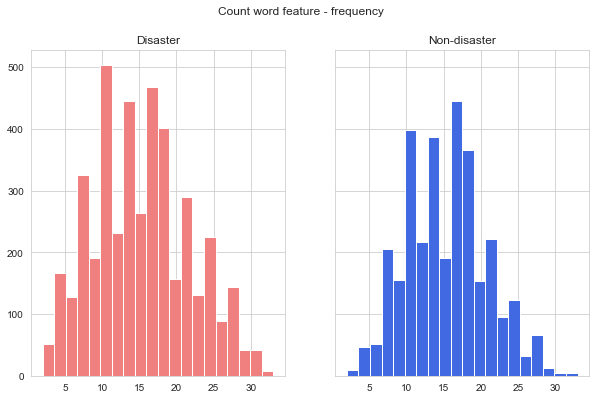

In [384]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['count_words']
disaster_processed =df_train[df_train['target'] == 1]['count_words']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("Count word feature - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['count_words'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['count_words'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 2: Number of unique words

In [385]:
# We create a new feature for the number of words. It counts the number of characters present in a tweet.
def count_unique_words(text):
    return len(set(text.split()))
#-----------------------------------------------------------------------------------------------------
df_train['count_unique_words'] = df_train["new_content_cleaned"].apply(count_unique_words)
df_test['count_unique_words'] = df_test["new_content_cleaned"].apply(count_unique_words)

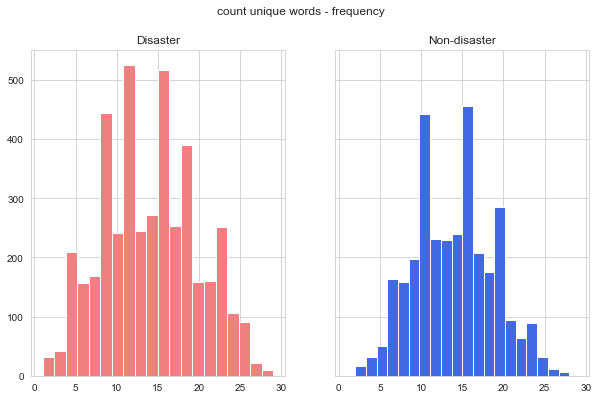

In [386]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['count_unique_words']
disaster_processed =df_train[df_train['target'] == 1]['count_unique_words']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("count unique words - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['count_unique_words'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['count_unique_words'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 3:  Number of capital words

In [387]:
# We create a new feature for the number of capital word: it counts the number of capital words present in a tweet.

def count_capital_words(text):
    return sum(map(str.isupper,text.split()))
#-----------------------------------------------------------------------------------------------------
df_train['count_capital_words'] = df_train["new_content_cleaned"].apply(count_capital_words)
df_test['count_capital_words'] = df_test["new_content_cleaned"].apply(count_capital_words)

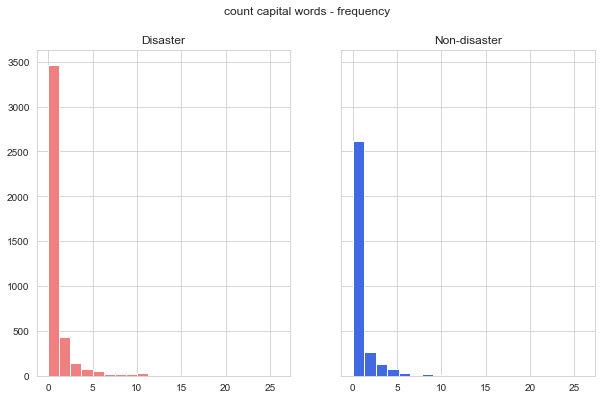

In [388]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['count_capital_words']
disaster_processed =df_train[df_train['target'] == 1]['count_capital_words']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("count capital words - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['count_capital_words'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['count_capital_words'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 4: Average length of words

In [389]:
# define a function that returns the average length of words. This can be calculated by dividing the counts of characters by counts of words.
def avg_word_length(string):
    words = string.split()
    total_len = sum([len(words[i]) for i in range(len(words))])
    avg_len = round(total_len / len(words), 2)
    return avg_len
#-----------------------------------------------------------------------------------------------------
df_train['avg_word_length'] = df_train["new_content_cleaned"].apply(avg_word_length)
df_test['avg_word_lenght'] =df_test["new_content_cleaned"].apply(avg_word_length)

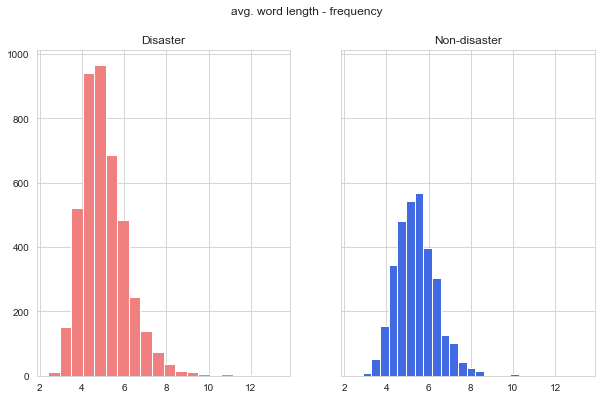

In [390]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['avg_word_length']
disaster_processed =df_train[df_train['target'] == 1]['avg_word_length']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("avg. word length - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['avg_word_length'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['avg_word_length'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 5: Number of mentions

In [391]:
# We define a function that returns the number of mentions in a string. On Twitter, most of the time people reply or mention someone in their tweet, counting the number of mentions can also be treated as a feature.
def count_mentions(text):
    x = re.findall(r'(@w[A-Za-z0-9]*)', text)
    return len(x)
#-----------------------------------------------------------------------------------------------------
df_train['count_mentions'] = df_train["new_content_cleaned"].apply(count_mentions)
df_test['count_mentions'] = df_test["new_content_cleaned"].apply(count_mentions)

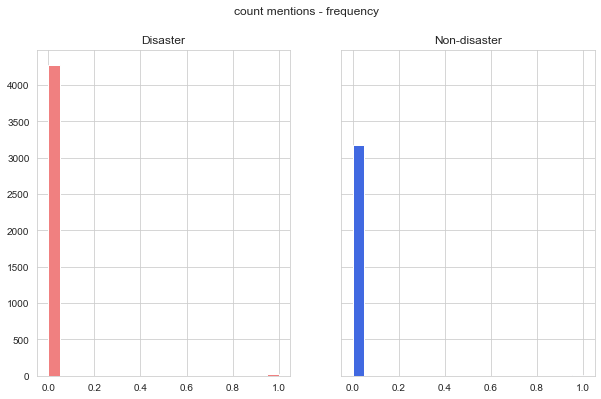

In [392]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['count_mentions']
disaster_processed =df_train[df_train['target'] == 1]['count_mentions']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("count mentions - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['count_mentions'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['count_mentions'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 6: Count of stopwords

In [393]:
import nltk
import string
from nltk.corpus import stopwords

# We define a function that returns count the number of stopwords used in a tweet.
def count_stopwords(text):
    # Tokenize text into list
    word_tokenize = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))  
    stopwords_x = [w for w in word_tokenize if w in stop_words]
    return len(stopwords_x)
#-----------------------------------------------------------------------------------------------------
df_train['count_stopwords'] = df_train["new_content_cleaned"].apply(count_stopwords)
df_test['count_stopwords'] = df_test["new_content_cleaned"].apply(count_stopwords)

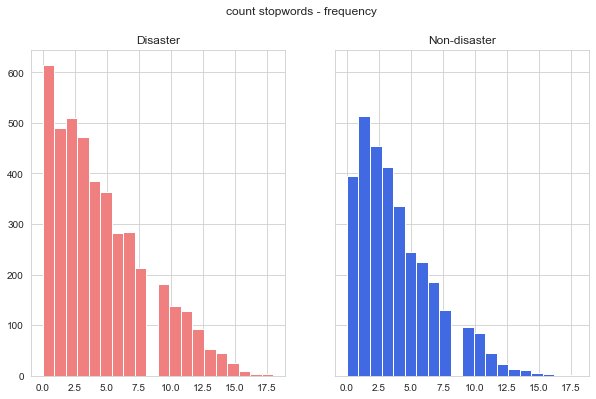

In [394]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['count_stopwords']
disaster_processed =df_train[df_train['target'] == 1]['count_stopwords']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("count stopwords - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['count_stopwords'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['count_stopwords'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 7: Number of proper nouns (PROPN)

In [395]:
#### Feature: Number of proper nouns (PROPN)
# define a function using nltk that returns the number of proper nouns in the text
def count_propernoun(text):    
    tokens = nltk.word_tokenize(text)
    tagged = [token for token in nltk.pos_tag(tokens)]
    propn_count = len([token for (token, tag) in tagged if tag == 'NNP' or tag == 'NNPS'])
    return propn_count
#-----------------------------------------------------------------------------------------------------
df_train['count_propernoun'] = df_train["new_content_cleaned"].apply(count_propernoun)
df_test['count_propernoun'] = df_test["new_content_cleaned"].apply(count_propernoun)

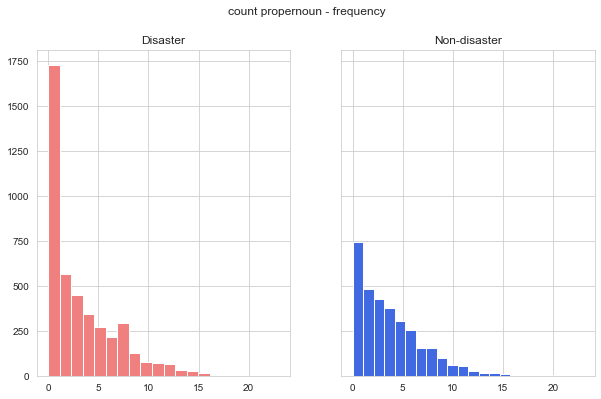

In [396]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['count_stopwords']
disaster_processed =df_train[df_train['target'] == 1]['count_stopwords']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("count propernoun - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['count_propernoun'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['count_propernoun'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 8: Number of non-proper nouns (NOUN)

In [397]:
import spacy
nlp = spacy.load('en_core_web_sm')
#------------------------------------------
# We define a function that returns number of non-proper nouns
def count_noun(text, model=nlp):
    doc = model(text)
    pos = [token.pos_ for token in doc]
    return pos.count('NOUN')
#-----------------------------------------------------------------------------------------------------
df_train['count_noun'] = df_train["new_content_cleaned"].apply(count_noun)
df_test['count_noun'] = df_test["new_content_cleaned"].apply(count_noun)

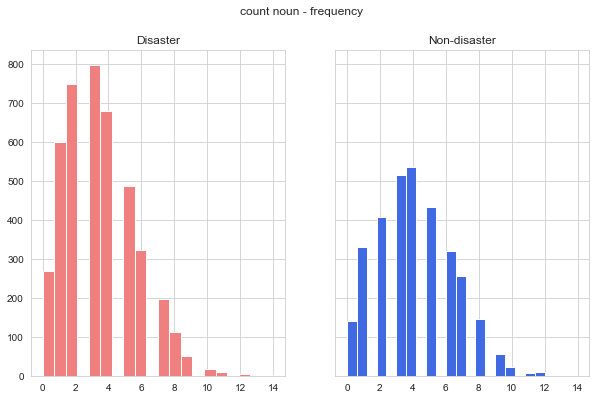

In [398]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['count_noun']
disaster_processed =df_train[df_train['target'] == 1]['count_noun']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("count noun - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['count_noun'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['count_noun'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 9: Number of hashtags

In [399]:
# We define a function that returns the number of hashtags in a string. Since we are using the Twitter dataset we can count the number of times users used the hashtag.
def count_htags(string):
    words = string.split()
    hashtags = [w for w in words if w.startswith('#')]
    return len(hashtags)
#-----------------------------------------------------------------------------------------------------
df_train["count_htags"] =df_train["new_content_cleaned"].apply(count_htags)
df_test["count_htags"] = df_test["new_content_cleaned"].apply(count_htags)

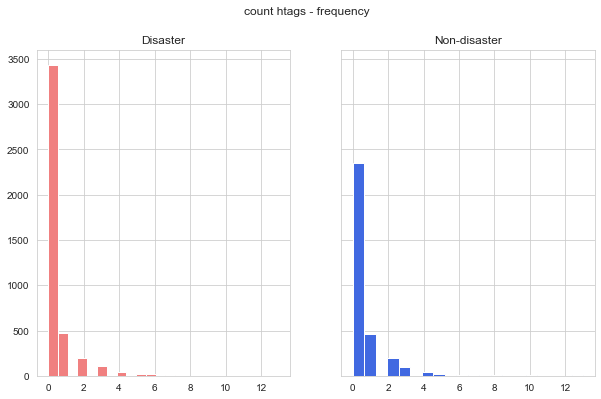

In [400]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['count_htags']
disaster_processed =df_train[df_train['target'] == 1]['count_htags']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("count htags - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['count_htags'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['count_htags'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 10: Number of characters

In [401]:
# We define a new feature for the number of characters excluding white spaces. It counts the number of characters present in a tweet.
def count_chars(string):
    words = string.split()
    return len(words)- words.count(" ")
#-----------------------------------------------------------------------------------------------------
df_train["char_count"] = df_train["new_content_cleaned"].apply(count_chars)
df_test["char_count"] = df_test["new_content_cleaned"].apply(count_chars)

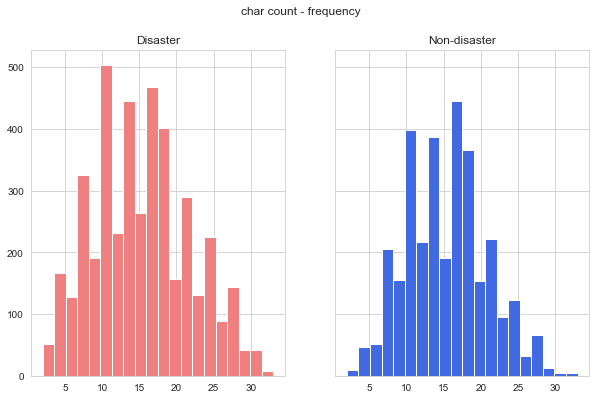

In [402]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['char_count']
disaster_processed =df_train[df_train['target'] == 1]['char_count']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("char count - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['char_count'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['char_count'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 11: Number of sentences

In [403]:
# We define a function that returns the number of sentences. It counts the number of sentences in a tweet.
def sentences_count(text):
    return len(nltk.sent_tokenize(text))
#-----------------------------------------------------------------------------------------------------
df_train["sentences_count"] = df_train["new_content_cleaned"].apply(sentences_count)
df_test["sentences_count"] = df_test["new_content_cleaned"].apply(sentences_count)

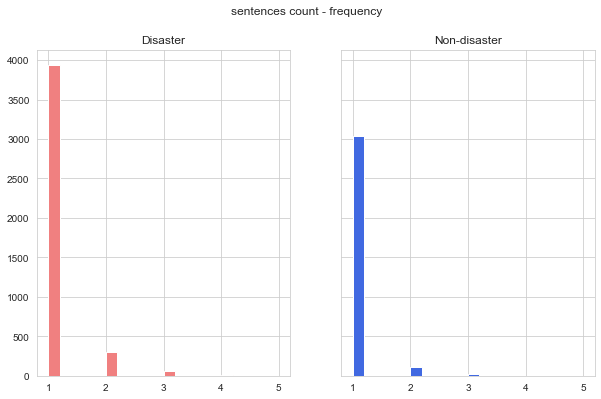

In [404]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['sentences_count']
disaster_processed =df_train[df_train['target'] == 1]['sentences_count']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("sentences count - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['sentences_count'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['sentences_count'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 12: Average sentence length

In [405]:
# We define a function that returns the average sentence length.This can be calculated by dividing the counts of words by the counts of sentences.
def avg_sentence_length(text):
    avg_len = round(len(text.split()) / len(nltk.sent_tokenize(text)), 2)
    return avg_len

#df['avg_sentlength'] = df['word_count']/df['sent_count']
#-----------------------------------------------------------------------------------------------------
df_train['avg_sentence_length'] =df_train["new_content_cleaned"].apply(avg_sentence_length)
df_test['avg_sentence_lenght'] = df_test["new_content_cleaned"].apply(avg_sentence_length)

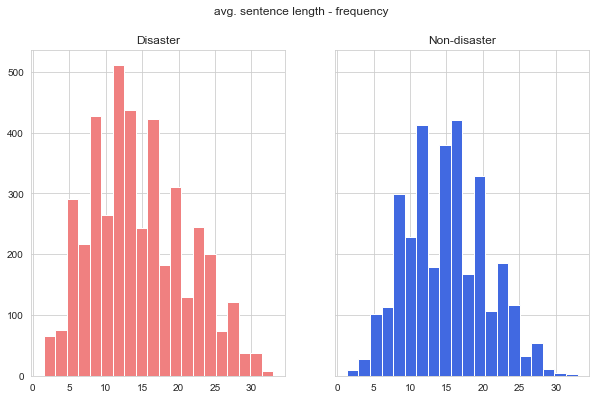

In [406]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['avg_sentence_length']
disaster_processed =df_train[df_train['target'] == 1]['avg_sentence_length']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("avg. sentence length - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['avg_sentence_length'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['avg_sentence_length'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 13: unique words vs word count feature

In [407]:
# This feature is basically the ratio of unique words to a total number of words. The function is defined as follow:
def unique_vs_words(text):
    avg_len = round(len(set(text.split()))/ len(text.split()), 2)
    return avg_len

#df['unique_vs_words'] = df['unique_word_count']/df['word_count']
#-----------------------------------------------------------------------------------------------------
df_train['unique_vs_words'] = df_train["new_content_cleaned"].apply(unique_vs_words)
df_test['unique_vs_words'] = df_test["new_content_cleaned"].apply(unique_vs_words)

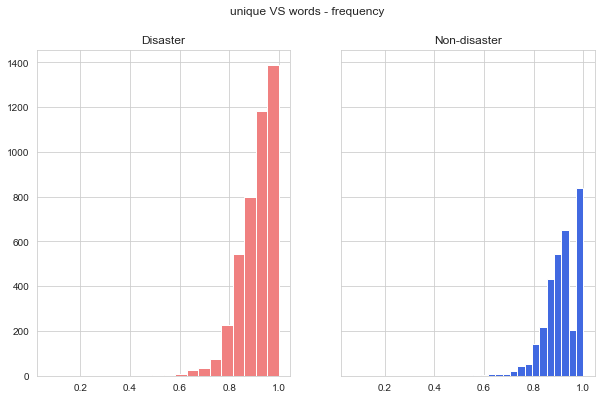

In [408]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['unique_vs_words']
disaster_processed =df_train[df_train['target'] == 1]['unique_vs_words']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("unique VS words - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['unique_vs_words'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['unique_vs_words'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 14: Stopwords count vs words counts feature

In [409]:
#This feature is also the ratio of counts of stopwords to the total number of words.The function is defined as follow:
def stopwords_vs_words(text):
    avg_len = round(count_stopwords(text)/ count_words(text), 2)
    return avg_len

#df['stopwords_vs_words'] = df['stopword_count']/df['word_count']
#-----------------------------------------------------------------------------------------------------
df_train['stopwords_vs_words'] = df_train["new_content_cleaned"].apply(stopwords_vs_words)
df_test['stopwords_vs_words'] = df_test["new_content_cleaned"].apply(stopwords_vs_words)

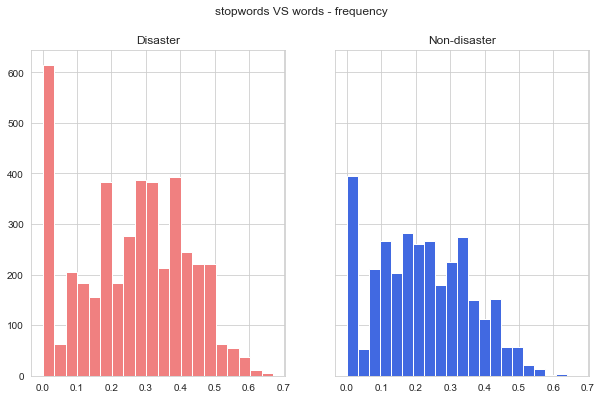

In [410]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['stopwords_vs_words']
disaster_processed =df_train[df_train['target'] == 1]['stopwords_vs_words']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("stopwords VS words - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['stopwords_vs_words'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['stopwords_vs_words'].hist(ax=axes[1], bins=20, color = "royalblue")

#### Feature 15: Percentage of characters that are punctuation

In [411]:
import string

# We define a function that returns the percentage of punctuation
def percent_punct(text):
    total_count = len(text) - text.count(" ")
    punc_count = sum([1 for c in text if c in string.punctuation])
    if punc_count != 0 and total_count != 0:
        return round(punc_count / total_count * 100, 2)
    else:
        return 0
#-----------------------------------------------------------------------------------------------------
df_train["percent_punct"] = df_train["new_content_cleaned"].apply(percent_punct)
df_test["percent_punct"] = df_test["new_content_cleaned"].apply(percent_punct)

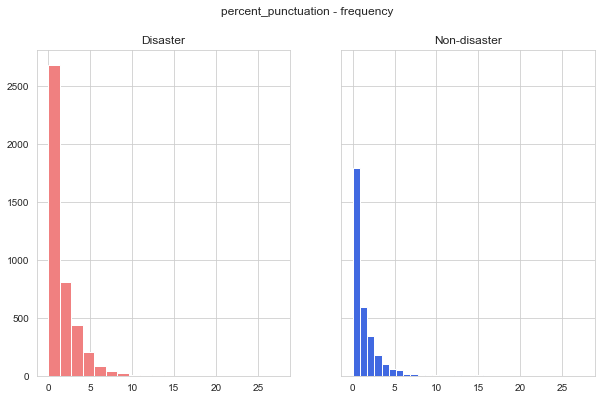

In [412]:
# Feature exploitation
#------------------------
non_disaster_processed = df_train[df_train['target'] == 0]['percent_punct']
disaster_processed =df_train[df_train['target'] == 1]['percent_punct']
#--------------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, sharex=True, sharey=True,figsize=(10, 6))
fig.suptitle("percent_punctuation - frequency")
axes[0].title.set_text("Disaster")
axes[1].title.set_text("Non-disaster")

_ = df_train[df_train['target'] == 0]['percent_punct'].hist(ax=axes[0], bins=20, color = "lightcoral")
_ = df_train[df_train['target'] == 1]['percent_punct'].hist(ax=axes[1], bins=20, color = "royalblue")

In [413]:
# View of the feature columns that were created for the data train

df_train[['count_words', 'count_unique_words', 'count_capital_words',
       'avg_word_length', 'count_mentions', 'count_stopwords',
       'count_propernoun', 'count_noun', 'count_htags', 'char_count',
       'sentences_count', 'avg_sentence_length', 'unique_vs_words',
       'stopwords_vs_words', 'percent_punct']].head(5)
#df_train.columns

,count_words,count_unique_words,count_capital_words,avg_word_length,count_mentions,count_stopwords,count_propernoun,count_noun,count_htags,char_count,sentences_count,avg_sentence_length,unique_vs_words,stopwords_vs_words,percent_punct
31,5,4,0,7.00,0,0,2,0,0,5,1,5.0,0.80,0.0,2.86
32,10,10,1,4.10,0,2,1,1,2,10,1,10.0,1.00,0.2,4.88
33,10,9,1,5.50,0,1,4,4,1,10,1,10.0,0.90,0.1,1.82
34,8,7,0,4.25,0,4,1,0,0,8,2,4.0,0.88,0.5,2.94
35,13,13,9,3.69,0,0,9,3,0,13,1,13.0,1.00,0.0,0.00


In [414]:
# View of the feature columns that were created for the data test 

df_test.head(3)

,keyword,text,new_content,new_content_cleaned_without_hashtag_aerobase,new_content_cleaned,new_content_cleaned_advanced,count_words,count_unique_words,count_capital_words,avg_word_lenght,...,count_stopwords,count_propernoun,count_noun,count_htags,char_count,sentences_count,avg_sentence_lenght,unique_vs_words,stopwords_vs_words,percent_punct
15,ablaze,Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU,ablaze Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU,ablaze Birmingham Wholesale Market is ablaze BBC News Fire breaks out at Birmingham s Wholesale Market,ablaze Birmingham Wholesale Market is ablaze BBC News Fire breaks out at Birmingham s Wholesale Market,ablaze birmingham wholesale market ablaze bbc news fire break birmingham s wholesale market,16,12,1,5.44,...,4,8,0,0,16,1,16.0,0.75,0.25,0.00
16,ablaze,@sunkxssedharry will you wear shorts for race ablaze ?,ablaze @sunkxssedharry will you wear shorts for race ablaze ?,ablaze sunkxssedharry will you wear shorts for race ablaze,ablaze @sunkxssedharry will you wear shorts for race ablaze,ablaze wear short race ablaze,9,8,0,5.67,...,3,0,2,0,9,1,9.0,0.89,0.33,1.96
17,ablaze,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI,ablaze #PreviouslyOnDoyinTv: Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI,ablaze PreviouslyOnDoyinTv Toke Makinwa s marriage crisis sets Nigerian Twitter ablaze,ablaze #PreviouslyOnDoyinTv Toke Makinwas marriage crisis sets Nigerian Twitter ablaze,ablaze previouslyondoyintv toke makinwa marriage crisis set nigerian twitter ablaze,10,9,0,7.70,...,0,4,3,1,10,1,10.0,0.90,0.00,1.30


#### Part 2-3 Comparaison between true and fake news using WordCloud visualisation 

* We generate world cloud of the "new_content_cleaned" column  and we compare it to the original "new_content" column as follow: 

'==================='

'For the data train'

'==================='

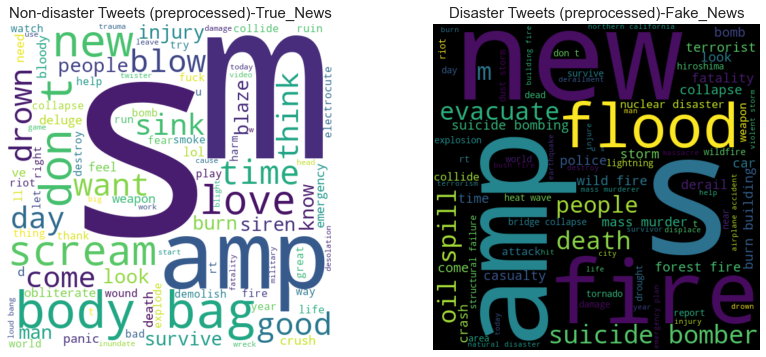

In [415]:
#'For the data train'
#=====================================================================================================================
# make object of wordcloud
wc = WordCloud(background_color='white',min_font_size=10,width=500,height=500)
wd= WordCloud(background_color='black',min_font_size=10,width=500,height=500)
#----------------------------------------------------------------------------------------
# We concat all the preprocessed text for both labels

#-------------------------------------------------------------------------------------------------
# preproceed data
#-----------------
non_disaster_processed = wc.generate(df_train[df_train['target'] == 0]['new_content_cleaned_advanced'].str.cat(sep=" "))
#-------------------------------------------------------------------------------------------------
disaster_processed = wd.generate(df_train[df_train['target'] == 1]['new_content_cleaned_advanced'].str.cat(sep=" "))

#=======================================================================================================================
# create subplots for the generated clouds
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].imshow(non_disaster_processed, interpolation='bilinear')
axes[1].imshow(disaster_processed,interpolation='bilinear')

# turn the axis off
[ax.axis('off') for ax in axes.ravel()]

# add titles
#axes[0,0].set_title('Non-disaster Tweets (raw)-True_News ', fontsize=15)
#axes[0,1].set_title('Disaster Tweets (raw)-Fake_News', fontsize=15)
axes[0].set_title('Non-disaster Tweets (preprocessed)-True_News', fontsize=15)
axes[1].set_title('Disaster Tweets (preprocessed)-Fake_News', fontsize=15)

# show the figure
display('===================')
display('For the data train')
display('===================')
plt.show()



* We have now a tool that allows us to see the frequently used words that actually are meaningful. 
* We notice that disaster related words are showing on the word cloud of real disaster Tweets.


#### Part 2-4 Comparaison : Difference between features- Disaster VS Non-Disaster 

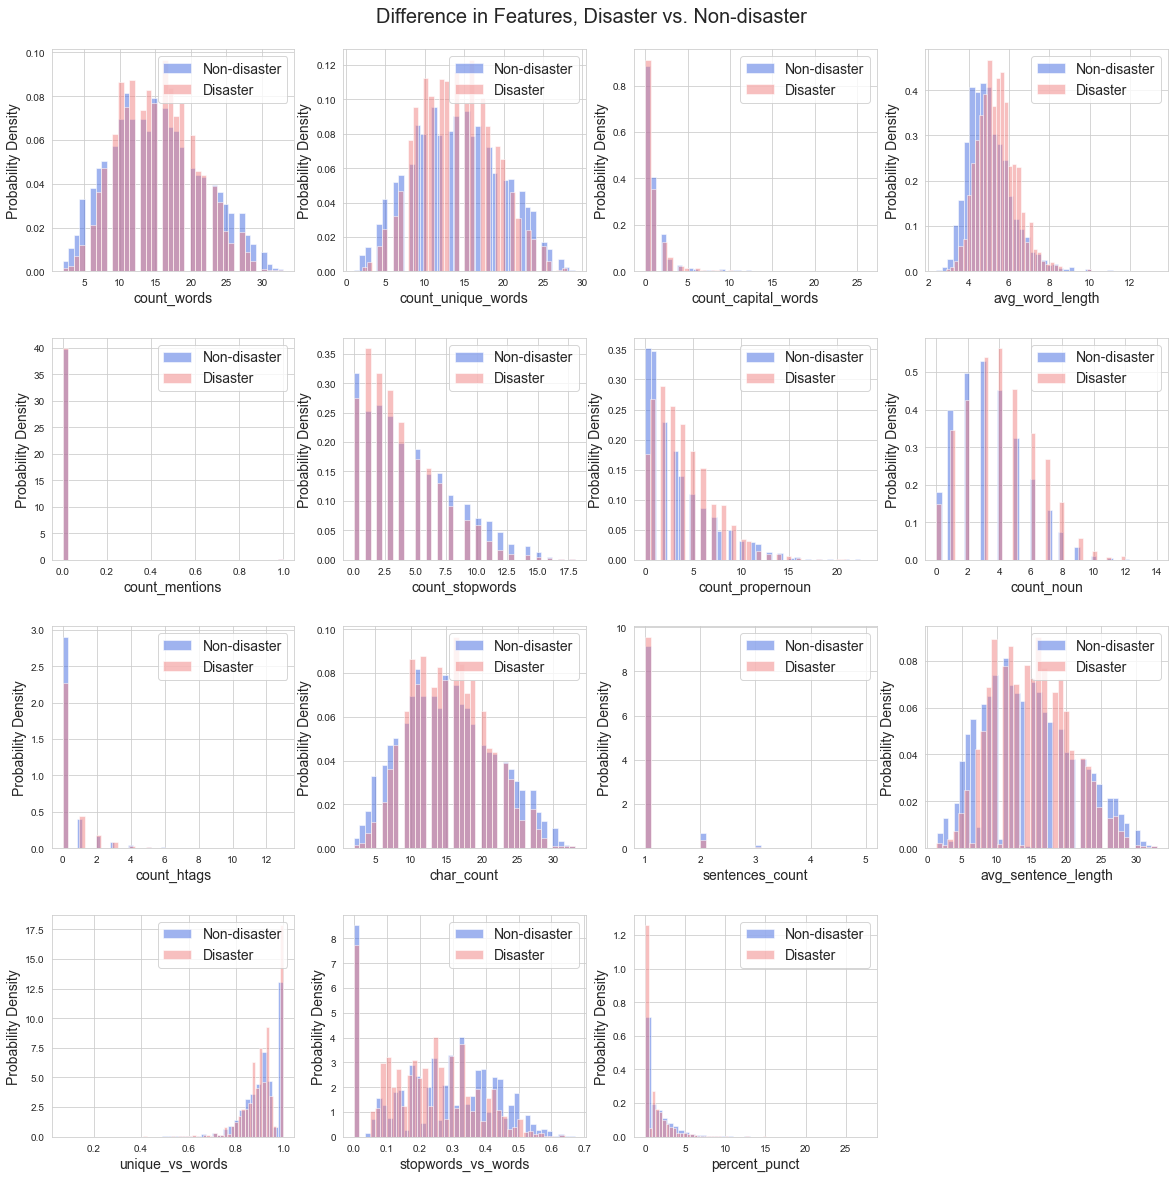

In [416]:

# We store the features and their names in variables
features = ['count_words', 'count_unique_words', 'count_capital_words',
       'avg_word_length', 'count_mentions', 'count_stopwords',
       'count_propernoun', 'count_noun', 'count_htags', 'char_count',
       'sentences_count', 'avg_sentence_length', 'unique_vs_words',
       'stopwords_vs_words', 'percent_punct']

# We create the figure
fig = plt.figure(figsize=(20, 20))

# We adjust the height of the padding between subplots to avoid overlapping
plt.subplots_adjust(hspace=0.3)

# We add a centered suptitle to the figure
plt.suptitle("Difference in Features, Disaster vs. Non-disaster", fontsize=20, y=0.91)

# We generate the histograms in a for loop
for i, feature in enumerate(features):
    
    # add a new subplot iteratively
    ax = plt.subplot(4, 4, i+1)
    ax = df_train[df_train['target']==0][feature].hist(alpha=0.5, label='Non-disaster', bins=40, color='royalblue', density=True)
    ax = df_train[df_train['target']==1][feature].hist(alpha=0.5, label='Disaster', bins=40, color='lightcoral', density=True)
    
    # set x_label, y_label, and legend
    ax.set_xlabel(features[i], fontsize=14)
    ax.set_ylabel('Probability Density', fontsize=14)
    ax.legend(loc='upper right', fontsize=14)
    

# shot the figure
plt.show()


* We'll use the following features:\
1-count_words,\
2-count_unique_words,\
3-avg_word_length,\
4-char_count,\
5-avg_sentence_length

for our models as they show bigger differences in distributions than other features we've created.
* We won't use the feature "stopwords_vs_words", as there is presence of an outlyer near the y-axis=0

* Note: The y-axis in the plots above is probability density, not # of Tweets due to the different size of disaster/non-disaster Tweets.



#### Part 2-6  Analysis: Specific count of words

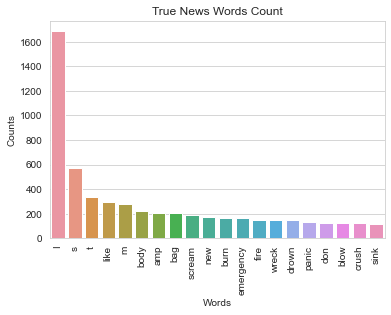

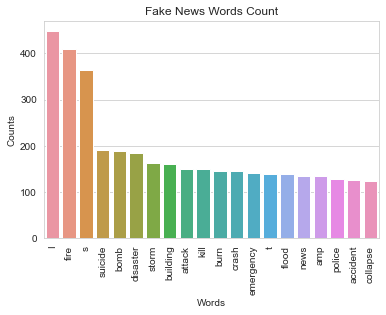

In [417]:
# library for Count Words
from collections import Counter
#-------------------------------------------------------

# We create list of True News words
true_news_words_list = df_train[df_train['target']==0]['new_content_cleaned_advanced'].str.cat(sep = " ").split()

# We create a DataFrame
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

#-------------------------------------------------------
# create list of Fake News words
fake_news_words_list =  df_train[df_train['target']==1]['new_content_cleaned_advanced'].str.cat(sep = " ").split()

# create DataFrame of that
fake_news_words_df = pd.DataFrame(Counter(fake_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=fake_news_words_df[0],y=fake_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Fake News Words Count')
plt.show()



* Notice: that for the fake news, the most relevent word are "fire" and "suicide", and for the true news they are driven by words like "like" and "body".

#### Part 2-7  Features selection


The selected features that we will be using when building our models are:\
1-count_words,\
2-count_unique_words,\
3-avg_word_length,\
4-char_count,\
5-avg_sentence_length

In [418]:
# Let's Separate our Input and Output Columns

X = df_train["new_content_cleaned_advanced"].values # we will use the last cleaned column
y = df_train['target'].values

In [419]:
# let's do Train Test Split of our Data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [420]:
# let's do Train Test Split of our Data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Now Let's Do Vectorization of Transformed Content Using Bag of Words Technique
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# create object of CountVectorizer
cf = CountVectorizer(max_features=5000)

In [421]:
# Convert X_train and Y_train into Vectors
X_trf =  cf.fit_transform(X).toarray()
X_train = cf.fit_transform(X_train).toarray()
X_test = cf.transform(X_test).toarray()

### Part 3- Modelling

* In this part, we will choose differents models and compare them.

#### Part 3-1 Model building

In [422]:
# import required Models 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,ShuffleSplit,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, f1_score, recall_score
from sklearn.metrics import classification_report

In [344]:
# Function to Find Best Model and Parameters of that Model. We test many models in order to chose 3 to present in this project
def check_model(X,y):
    algos = {
        'lgr':{
            'model':LogisticRegression(),
            'params':{
                'C':[0.1,0.01,1,0.5,2,10,20]}},
        #-----------------------------------------
        'mnb':{
            'model':MultinomialNB(),
            'params':{}},
        #-----------------------------------------
        'bnb':{
            'model':BernoulliNB(),
            'params':{ }},
        #-----------------------------------------
        'gnb':{
            'model':GaussianNB(),
            'params':{}},
        #-----------------------------------------
         #'svc':{
         #   'model':SVC(),
         #   'params':{}}#,
         #-----------------------------------------
        # 'dtc':{
        #    'model':DecisionTreeClassifier(),
         #   'params':{}},
         #-----------------------------------------
         #'knc':{
         #   'model':KNeighborsClassifier(),
          #  'params':{}},
         #-----------------------------------------
        # 'rfc':{
          #  'model':RandomForestClassifier(),
         #   'params':{}},
         #-----------------------------------------
       # 'gbc':{
          #  'model':GradientBoostingClassifier(),
          #  'params':{}},
         #-----------------------------------------               
        
             }
    
    score = []
    
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
        gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],n_jobs=-1,cv=cv)
        gd.fit(X,y)
        score.append({'model_name':model_name,'acc_score':gd.best_score_,'best_params':gd.best_params_})
       
    return pd.DataFrame(score)

In [65]:
# Model's Scores and their Best Parameters
check_model(X_trf,y)

,model_name,acc_score,best_params
0,lgr,0.808690,{'C': 0.5}
1,mnb,0.803342,{}
2,bnb,0.810963,{}
3,gnb,0.596123,{}


*Note: We have tested many models as below:





In [423]:
# Function to Find Best Model and Parameters of that Model. We test many models in order to chose 3 to present in this project
def check_model_dtc(X,y):
    algos = {'dtc':{
            'model':DecisionTreeClassifier(),
            'params':{}}
            }
    score = []
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
        gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],n_jobs=-1,cv=cv)
        gd.fit(X,y)
        score.append({'model_name':model_name,'acc_score':gd.best_score_,'best_params':gd.best_params_})
       
    return pd.DataFrame(score)


#===================================================================================================
def check_model_knc(X,y):
    algos = {'knc':{
            'model':KNeighborsClassifier(),
            'params':{}}
            }
    score = []
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
        gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],n_jobs=-1,cv=cv)
        gd.fit(X,y)
        score.append({'model_name':model_name,'acc_score':gd.best_score_,'best_params':gd.best_params_})
       
    return pd.DataFrame(score)
#===================================================================================================
def check_model_rfc(X,y):
    algos = {'rfc':{
            'model':RandomForestClassifier(),
            'params':{}}
            }
    score = []
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
        gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],n_jobs=-1,cv=cv)
        gd.fit(X,y)
        score.append({'model_name':model_name,'acc_score':gd.best_score_,'best_params':gd.best_params_})
       
    return pd.DataFrame(score)
#===================================================================================================
def check_model_gbc(X,y):
    algos = {'gbc':{
            'model':GradientBoostingClassifier(),
            'params':{}}
            }
    score = []
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
        gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],n_jobs=-1,cv=cv)
        gd.fit(X,y)
        score.append({'model_name':model_name,'acc_score':gd.best_score_,'best_params':gd.best_params_})
       
    return pd.DataFrame(score)
#===================================================================================================
def check_model_svc(X,y):
    algos = {'svc':{
            'model':SVC(),
            'params':{}}
            }
    score = []
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
        gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],n_jobs=-1,cv=cv)
        gd.fit(X,y)
        score.append({'model_name':model_name,'acc_score':gd.best_score_,'best_params':gd.best_params_})
       
    return pd.DataFrame(score)

In [426]:
# Model Evaluation of Logistic Regression
display('Check Model DecisionTreeClassifier')
display(check_model_dtc(X_trf,y))
#-------------------------------------------------------------------------------
# Model Evaluation of BernoulliNB
display('Check Model KNeighborsClassifier')
display(check_model_knc(X_trf,y))
#-------------------------------------------------------------------------------
# Model Evaluation of GaussianNB
display('Check Model RandomForestClassifier')
display(check_model_rfc(X_trf,y))
#-------------------------------------------------------------------------------
# Model Evaluation of MultinomialNB
display('Check Model GradientBoostingClassifier')
display(check_model_gbc(X_trf,y))
#-------------------------------------------------------------------------------
# Model Evaluation of MultinomialNB
display('Check Model SVC')
display(check_model_svc(X_trf,y))

'Check Model DecisionTreeClassifier'

,model_name,acc_score,best_params
0,dtc,0.749465,{}


'Check Model KNeighborsClassifier'

,model_name,acc_score,best_params
0,knc,0.746524,{}


'Check Model RandomForestClassifier'

,model_name,acc_score,best_params
0,rfc,0.795053,{}


'Check Model GradientBoostingClassifier'

,model_name,acc_score,best_params
0,gbc,0.75,{}


'Check Model SVC'

,model_name,acc_score,best_params
0,svc,0.80615,{}


* We can classify some models by the accuracy score associated to: 
   
1-BernoulliNB: 0.810963

2-LogisticRegression: 0.808690

3-SVC: 0.80615

4-MultinomialNB: 0.803342

5-RandomForestClassifier: 0.795053

6-GradientBoostingClassifier: 0.75

7-DecisionTreeClassifier: 0.747727     

8-KNeighborsClassifier: 0.746524

9-GaussianNB: 0.596123


    

* We will choose to work with for the rest of the project:

1-BernoulliNB: 0.810963 \
2-LogisticRegression: 0.808690 \
3-MultinomialNB: 0.803342


In [424]:
# Function to Find Best Model and Parameters of that Model. We test many models in order to chose 3 to present in this project
def check_model_final(X,y):
    algos = {
        'lgr':{
            'model':LogisticRegression(),
            'params':{
                'C':[0.1,0.01,1,0.5,2,10,20]}},
        #-----------------------------------------
        'mnb':{
            'model':MultinomialNB(),
            'params':{}},
        #-----------------------------------------
        'bnb':{
            'model':BernoulliNB(),
            'params':{ }},
        
             }
    
    score = []
    
    for model_name,config in algos.items():
        cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
        gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],n_jobs=-1,cv=cv)
        gd.fit(X,y)
        score.append({'model_name':model_name,'acc_score':gd.best_score_,'best_params':gd.best_params_})
       
    return pd.DataFrame(score)

In [425]:
# Let's Evaluate Model
def model_evaluation(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train,train_pred)
    test_acc = accuracy_score(y_test,test_pred)
    
    train_score = pd.Series({'accuracy_score':accuracy_score(y_train,train_pred),
                             'precision_score':precision_score(y_train,train_pred),
                             'f1_score':f1_score(y_train,train_pred),
                             'recall_score':recall_score(y_train,train_pred)
                            
                            })
    
    
    test_score = pd.Series({'accuracy_score':accuracy_score(y_test,test_pred),
                            'precision_score':precision_score(y_test,test_pred),
                            'f1_score':f1_score(y_test,test_pred),
                            'recall_score':recall_score(y_test,test_pred)
                           
                           })
    
    
    scorecard = pd.concat([train_score,test_score],axis=1)
    
    scorecard.columns = ['Train_data','Test_data']
    
    return scorecard

In [68]:
# Results:
#==========
display('Check 3- Models')
display(check_model_final(X_trf,y))
#-------------------------------------------------------------------------------

# Model Evaluation of Logistic Regression
display('Model Evaluation of Logistic Regression')
display(model_evaluation(LogisticRegression(C=0.5),X_train,X_test,y_train,y_test))
#-------------------------------------------------------------------------------
# Model Evaluation of BernoulliNB
display('Model Evaluation of of BernoulliNB')
display(model_evaluation(BernoulliNB(),X_train,X_test,y_train,y_test))
#-------------------------------------------------------------------------------
# Model Evaluation of MultinomialNB
display('Model Evaluation of of MultinomialNB')
display(model_evaluation(MultinomialNB(),X_train,X_test,y_train,y_test))

'Check 3- Models'

,model_name,acc_score,best_params
0,lgr,0.808690,{'C': 0.5}
1,mnb,0.803342,{}
2,bnb,0.810963,{}


'Model Evaluation of Logistic Regression'

,Train_data,Test_data
accuracy_score,0.896056,0.810829
precision_score,0.925287,0.803787
f1_score,0.870632,0.767461
recall_score,0.822074,0.734277


'Model Evaluation of of BernoulliNB'

,Train_data,Test_data
accuracy_score,0.867981,0.808155
precision_score,0.905730,0.837524
f1_score,0.832272,0.751084
recall_score,0.769835,0.680818


'Model Evaluation of of MultinomialNB'

,Train_data,Test_data
accuracy_score,0.860294,0.804144
precision_score,0.853598,0.777958
f1_score,0.831587,0.766161
recall_score,0.810683,0.754717


## TASK 2 - Feature generation and traditional ML model

You will now use TF-IDF to generate features for your dataset. Moreover, you can feel
free to create any other set of features (unigram, bigram, trigram, etc).

1-With the features you have created, select any traditional (non-neural network) model
to train a model and provide plots on the evaluation.\
2-Explain all of your choices.

Note: the model performance will not necessarily be judged, however the choice of
which model

### Part 1- Using TI-IDF

#### Part 1-1- Vectorizing Text & Selecting Input/Output

In [106]:
# We import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# We instantiate the vectorizer
tfidf = TfidfVectorizer()

# We fit and transform
X_tfidf = tfidf.fit_transform(df_train["new_content_cleaned_advanced"])

# We create a dataframe from the sparse matrix
X_tfidf_df = pd.DataFrame(X_tfidf.toarray())

# We check the dataframe
X_tfidf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11593,11594,11595,11596,11597,11598,11599,11600,11601,11602
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32408,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# We need to get the feature names from our stored vectorizer and assign them to X_tfidf_df

X_tfidf_df.columns = tfidf.get_feature_names_out()

# check the column names
X_tfidf_df.columns

Index(['aa', 'aamir', 'aan', 'aand', 'aar', 'aashiqui', 'ab', 'aba', 'abandon',
       'abbandoned',
       ...
       'zodiac', 'zombie', 'zone', 'zoom', 'zotar', 'zouma', 'zrnf', 'zss',
       'zumiez', 'zurich'],
      dtype='object', length=11603)

* The selected features are:

1-count_words,\
2-count_unique_words,\
3-avg_word_length,\
4-char_count,\
5-avg_sentence_length

In [71]:
# We create the new dataframe, X_features
X_features = pd.concat([df_train[['count_words', 'count_unique_words', 'avg_word_length', 'char_count','avg_sentence_length']],
                        X_tfidf_df], axis=1)

X_features=X_features[X_features['count_words'].notna()]

# We check the shape
display('=====================')
display('Shape of X_features:')
display('=====================')
display(X_features.shape)

# Lets check the dataframe associated to 
display('==================================')
display('A look at the dataframe X_features')
display('==================================')
display(X_features.head(5))

'====================='

'Shape of X_features:'

'====================='

(7480, 11608)

'=================================='

'A look at the dataframe X_features'

'=================================='

,count_words,count_unique_words,avg_word_length,char_count,avg_sentence_length,aa,aamir,aan,aand,aar,...,zodiac,zombie,zone,zoom,zotar,zouma,zrnf,zss,zumiez,zurich
31,5.0,4.0,7.00,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,10.0,10.0,4.10,10.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,10.0,9.0,5.50,10.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,8.0,7.0,4.25,8.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,13.0,13.0,3.69,13.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Part 1-2-  Splitting Into Train and Validation Data

In [72]:
df_train['target'].shape

(7480,)

In [74]:
# We import the library
from sklearn.model_selection import train_test_split


# We select the input/output
X = X_features.fillna(0) # we use the selected features
y = df_train['target']

# We split the data
# the names, X_val and y_val, are used instead of X_test and y_test to avoid confusion with our actual test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [76]:
# Results:
#==========
display('Check 3- Models')
display(check_model_final(X,y))
#-------------------------------------------------------------------------------

# Model Evaluation of Logistic Regression
display('Model Evaluation of Logistic Regression')
display(model_evaluation(LogisticRegression(C=0.5),X_train,X_val,y_train,y_val))
#-------------------------------------------------------------------------------
# Model Evaluation of BernoulliNB
display('Model Evaluation of of BernoulliNB')
display(model_evaluation(BernoulliNB(),X_train,X_val,y_train,y_val))
#-------------------------------------------------------------------------------
# Model Evaluation of MultinomialNB
display('Model Evaluation of of MultinomialNB')
display(model_evaluation(MultinomialNB(),X_train,X_val,y_train,y_val))


'Check 3- Models'

,model_name,acc_score,best_params
0,lgr,0.676337,{'C': 1}
1,mnb,0.616845,{}
2,bnb,0.622059,{}


'Model Evaluation of Logistic Regression'

,Train_data,Test_data
accuracy_score,0.760027,0.670455
precision_score,0.779456,0.653763
f1_score,0.683142,0.552225
recall_score,0.608013,0.477987


'Model Evaluation of of BernoulliNB'

,Train_data,Test_data
accuracy_score,0.842079,0.616310
precision_score,0.910723,0.574519
f1_score,0.789766,0.454373
recall_score,0.697172,0.375786


'Model Evaluation of of MultinomialNB'

,Train_data,Test_data
accuracy_score,0.692513,0.601604
precision_score,0.913349,0.635135
f1_score,0.458824,0.239796
recall_score,0.306363,0.147799


#### Part 1-3-  Model evaluation

* We will perform cross validation and grid search using RandomizedSearchCV on our top 3 models.


In [77]:
# import the libraries
from sklearn.model_selection import RandomizedSearchCV
from time import time

#### 1- Logistic Regression:

In [81]:
# We instantiate the model
lr = LogisticRegression(max_iter=10000, random_state=42)

# We set the parameters in generale, diffrent from our original function for cheching
param_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# We construct RandomizedSearchCV object
rs_lr = RandomizedSearchCV(lr, param_lr, scoring='accuracy', cv=5, n_iter=5, n_jobs=-1, random_state=42)

# We check the time
start = time()

# We fit the model
rs_lr_fit = rs_lr.fit(X_train, y_train)

# We check the time
end = time()

# We store the results in a dataframe
rs_rl_df = pd.DataFrame(rs_lr_fit.cv_results_).sort_values('mean_test_score', ascending=False)

# We  show the top 5 models
rs_rl_df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,114.653356,22.739273,0.182591,0.064333,1,{'C': 1},0.679198,0.670008,0.660819,0.677527,0.675585,0.672627,0.006667,1
3,315.052360,10.639783,0.127318,0.020230,10,{'C': 10},0.655806,0.648287,0.644946,0.651629,0.637960,0.647726,0.006065,2
1,29.682185,4.543998,0.244303,0.122026,0.1,{'C': 0.1},0.633250,0.632414,0.627402,0.654135,0.627926,0.635026,0.009835,3
4,440.756121,14.090703,0.082167,0.013512,100,{'C': 100},0.627402,0.606516,0.606516,0.614871,0.616221,0.614305,0.007705,4
0,24.492057,2.635940,0.236928,0.133947,0.01,{'C': 0.01},0.604010,0.598997,0.597327,0.601504,0.600334,0.600434,0.002265,5


In [82]:
# print out the algorithm, fitting time, best parameters, and best score
print('Logistic Regression:\nProcessing Time: {} secs | Best Parameters: {} | Best Score: {}'.format(round(end-start, 2),
                                                                                                     rs_lr_fit.best_params_, 
                                                                                                     round(rs_lr_fit.best_score_, 2)))



Logistic Regression:
Processing Time: 497.43 secs | Best Parameters: {'C': 1} | Best Score: 0.67


#### 2- BernoulliNB:

In [88]:
# instantiate the model
bnb = BernoulliNB()

# set the parameters
param_bnb=  {'alpha': [0.0001, 0.001, 0.1, 1, 10, 100,1000]}



In [90]:
# construct RandomizedSearchCV object
rs_bnb = RandomizedSearchCV(bnb, param_bnb, scoring='accuracy', cv=5, n_iter=7, n_jobs=-1, random_state=42)

# check the time
start = time()

# fit the model
rs_bnb_fit = rs_bnb.fit(X_train, y_train)

# check the time
end = time()

# store the results in a dataframe
rs_bnb_df = pd.DataFrame(rs_bnb_fit.cv_results_).sort_values('mean_test_score', ascending=False)

# show the top 5 models
rs_bnb_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,6.488463,1.784951,1.235648,0.241355,1,{'alpha': 1},0.619883,0.621554,0.629908,0.614035,0.602843,0.617645,0.008976,1
2,5.341201,1.324783,1.021551,0.382400,0.1,{'alpha': 0.1},0.592314,0.602339,0.605681,0.593150,0.556856,0.590068,0.017389,2
0,5.698895,1.624803,1.355843,0.333037,0.0001,{'alpha': 0.0001},0.584795,0.594820,0.583960,0.587302,0.563545,0.582884,0.010400,3
1,5.805002,1.304098,1.226728,0.424774,0.001,{'alpha': 0.001},0.585631,0.593985,0.583960,0.587302,0.563545,0.582884,0.010251,3
4,5.203644,0.662358,0.864417,0.220798,10,{'alpha': 10},0.574770,0.574770,0.574770,0.573935,0.574415,0.574532,0.000329,5


In [93]:
# print out the algorithm, fitting time, best parameters, and best score
print('BernouillNB:\nProcessing Time: {} secs | Best Parameters: {} | Best Score: {}'.format(round(end-start, 2),
                                                                                                         rs_bnb_fit.best_params_,
                                                                                                         round(rs_mnb_fit.best_score_, 2)))


BernouillNB:
Processing Time: 15.29 secs | Best Parameters: {'alpha': 1} | Best Score: 0.62


#### 3- MultinomialNB:

In [84]:
# We instantiate the model
mnb = MultinomialNB()

# We set the parameters in general
param_mnb = {'alpha': [0.0001, 0.001, 0.1, 1, 10, 100,1000]}

In [86]:
# construct RandomizedSearchCV object
rs_mnb = RandomizedSearchCV(mnb, param_mnb, scoring='accuracy', cv=5, n_iter=7, n_jobs=-1, random_state=42)

# check the time
start = time()

# fit the model
rs_mnb_fit = rs_mnb.fit(X_train, y_train)

# check the time
end = time()

# store the results in a dataframe
rs_mnb_df = pd.DataFrame(rs_mnb_fit.cv_results_).sort_values('mean_test_score', ascending=False)

# show the top 5 models
rs_mnb_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,1.163857,0.026037,0.135832,0.004641,0.1,{'alpha': 0.1},0.643275,0.628237,0.635756,0.642439,0.598662,0.629674,0.016424,1
1,1.054494,0.170592,0.137506,0.009932,0.001,{'alpha': 0.001},0.619048,0.604845,0.604845,0.612364,0.588629,0.605946,0.010150,2
0,0.737158,0.014234,0.118072,0.011327,0.0001,{'alpha': 0.0001},0.616541,0.603175,0.599833,0.609023,0.589465,0.603607,0.009067,3
3,1.190576,0.050491,0.123953,0.010691,1,{'alpha': 1},0.601504,0.595656,0.593150,0.599833,0.581104,0.594249,0.007208,4
4,0.843264,0.029245,0.143218,0.011172,10,{'alpha': 10},0.574770,0.574770,0.574770,0.573935,0.574415,0.574532,0.000329,5


In [87]:


# print out the algorithm, fitting time, best parameters, and best score
print('Multinomial Naive Bayes:\nProcessing Time: {} secs | Best Parameters: {} | Best Score: {}'.format(round(end-start, 2),
                                                                                                         rs_mnb_fit.best_params_,
                                                                                                         round(rs_mnb_fit.best_score_, 2)))



Multinomial Naive Bayes:
Processing Time: 4.47 secs | Best Parameters: {'alpha': 0.1} | Best Score: 0.63


#### Part 1-4- Final model selection

* We have obtained from the previous section the following results:
* Logistic Regression:\
Processing Time: 497.43 secs | Best Parameters: {'C': 1} | Best Score: 0.67

* Multinomial Naive Bayes:\
Processing Time: 4.47 secs | Best Parameters: {'alpha': 0.1} | Best Score: 0.63

* BernouillNB:\
Processing Time: 15.29 secs | Best Parameters: {'alpha': 1} | Best Score: 0.62                            
                                
                                
* By RandomizedSearchCV we found that Logistic Regression and Multinomial Naive Bayes perform the best 
with the default hyperparameter settings.\

* BernouillNB is way more faster than the other methods.

* BenouillNB has the best F1_score, accuracy score and precison score over the other methods.


* 'Model Evaluation of Logistic Regression'\
+++++++++++++Train_data--	Test_data\
accuracy_score	:0.760027	0.670455\
precision_score:	0.779456	0.653763\
f1_score	:0.683142	0.552225\
recall_score:	0.608013	0.477987


* 'Model Evaluation of of BernoulliNB'
+++++++++++++Train_data--	Test_data\
accuracy_score:	0.842079	0.616310\
precision_score:	0.910723	0.574519\
f1_score:	0.789766	0.454373\
recall_score:	0.697172	0.375786

* 'Model Evaluation of of MultinomialNB'\
+++++++++++++Train_data--	Test_data\
accuracy_score	:0.692513--	0.601604'\
precision_score:    0.913349	--0.635135'\
f1_score	       :0.458824	--0.239796'\
recall_score	:0.306363	--0.147799'

##### 1 -Deployment BernoulliNB model

In [138]:
# We import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# We instantiate the vectorizer
tfidf = TfidfVectorizer()

# We fit the cleaned text to the vectorizer
tfidf_vect_fit = tfidf.fit_transform(df_train["new_content_cleaned_advanced"])

# We create the vectorized columns
tfidf_train = tfidf.fit_transform(df_train["new_content_cleaned_advanced"])
tfidf_test = tfidf.transform(df_test["new_content_cleaned_advanced"])

#-------------------------------------------------------------------------------
# We create dataframes from the sparse matrices
tfidf_train_df = pd.DataFrame(tfidf_train.toarray())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray())

# We get the feature names from our stored vectorizers and assign them to tfidf_train_df and tfidf_test_df
# to avoid getting 'FutureWarning: Feature names only support names that are strings.'
tfidf_train_df.columns = tfidf.get_feature_names_out()
tfidf_test_df.columns = tfidf.get_feature_names_out()
#-------------------------------------------------------------------------------
# We concatenate back the vectorized data and the 5 features we've created
X_train_vect = pd.concat([df_train[['count_words', 'count_unique_words', 'char_count','avg_word_length','avg_sentence_length']].reset_index(drop=True),
                          tfidf_train_df], axis=1)
X_test_vect = pd.concat([df_test[['count_words', 'count_unique_words',  'char_count','avg_word_length','avg_sentence_length'] ].reset_index(drop=True)
                        ,tfidf_test_df], axis=1)

# We store the labels
y_train = df_train['target']

# We check the shape
#print(X_train_vect.shape,tfidf_test_df.shape)# X_test_vect.shape)

# We fit the model and check the processing time
start = time()
final_model = final_models['bnb']
final_model_fit = final_model.fit(X_train_vect, y_train)
end = time()
fit_time = end - start

# We make predictions and check the processing time
start = time()
final_pred = final_model.predict(X_test_vect)
end = time()
pred_time = end - start
#-------------------------------------------------------------------------------
print('Fit time: {} secs | Predict time: {} secs'.format(round(fit_time, 2), round(pred_time, 2)))

Fit time: 1.5 secs | Predict time: 0.64 secs


##### 2 -Deployment Logistic Regression model

In [141]:
# We import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# We instantiate the vectorizer
tfidf = TfidfVectorizer()

# We fit the cleaned text to the vectorizer
tfidf_vect_fit = tfidf.fit_transform(df_train["new_content_cleaned_advanced"])

# We create the vectorized columns
tfidf_train = tfidf.fit_transform(df_train["new_content_cleaned_advanced"])
tfidf_test = tfidf.transform(df_test["new_content_cleaned_advanced"])

#-------------------------------------------------------------------------------
# We create dataframes 
tfidf_train_df = pd.DataFrame(tfidf_train.toarray())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray())

# We get the feature names from our stored vectorizers and assign them to tfidf_train_df and tfidf_test_df
# to avoid getting 'FutureWarning: Feature names only support names that are strings.'
tfidf_train_df.columns = tfidf.get_feature_names_out()
tfidf_test_df.columns = tfidf.get_feature_names_out()
#-------------------------------------------------------------------------------
# Weconcatenate back the vectorized data and the 5 features we've created
X_train_vect = pd.concat([df_train[['count_words', 'count_unique_words', 'char_count','avg_word_length','avg_sentence_length']].reset_index(drop=True),
                          tfidf_train_df], axis=1)
X_test_vect = pd.concat([df_test[['count_words', 'count_unique_words',  'char_count','avg_word_length','avg_sentence_length'] ].reset_index(drop=True)
                        ,tfidf_test_df], axis=1)

# We store the labels
y_train = df_train['target']

# We check the shape
#print(X_train_vect.shape,tfidf_test_df.shape)# X_test_vect.shape)

# We fit the model and check the processing time
start = time()
final_model = final_models['lr']
final_model_fit = final_model.fit(X_train_vect, y_train)
end = time()
fit_time = end - start

# We make predictions and check the processing time
start = time()
final_pred = final_model.predict(X_test_vect)
end = time()
pred_time = end - start
#-------------------------------------------------------------------------------
print('Fit time: {} secs | Predict time: {} secs'.format(round(fit_time, 2), round(pred_time, 2)))

Fit time: 12.79 secs | Predict time: 0.16 secs


##### 3 -Deployment MultinomialNB model

In [142]:
# We import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# We instantiate the vectorizer
tfidf = TfidfVectorizer()

# We fit the cleaned text to the vectorizer
tfidf_vect_fit = tfidf.fit_transform(df_train["new_content_cleaned_advanced"])

# We create the vectorized columns
tfidf_train = tfidf.fit_transform(df_train["new_content_cleaned_advanced"])
tfidf_test = tfidf.transform(df_test["new_content_cleaned_advanced"])

#-------------------------------------------------------------------------------
# We create dataframes from the sparse matrices
tfidf_train_df = pd.DataFrame(tfidf_train.toarray())
tfidf_test_df = pd.DataFrame(tfidf_test.toarray())

# We get the feature names from our stored vectorizers and assign them to tfidf_train_df and tfidf_test_df
# to avoid getting 'FutureWarning: Feature names only support names that are strings.'
tfidf_train_df.columns = tfidf.get_feature_names_out()
tfidf_test_df.columns = tfidf.get_feature_names_out()
#-------------------------------------------------------------------------------
# concatenate back the vectorized data and the 5 features we've created
X_train_vect = pd.concat([df_train[['count_words', 'count_unique_words', 'char_count','avg_word_length','avg_sentence_length']].reset_index(drop=True),
                          tfidf_train_df], axis=1)
X_test_vect = pd.concat([df_test[['count_words', 'count_unique_words',  'char_count','avg_word_length','avg_sentence_length'] ].reset_index(drop=True)
                        ,tfidf_test_df], axis=1)

# We store the labels
y_train = df_train['target']

# We check the shape
#print(X_train_vect.shape,tfidf_test_df.shape)# X_test_vect.shape)

# We fit the model and check the processing time
start = time()
final_model = final_models['mnb']
final_model_fit = final_model.fit(X_train_vect, y_train)
end = time()
fit_time = end - start

# We make predictions and check the processing time
start = time()
final_pred = final_model.predict(X_test_vect)
end = time()
pred_time = end - start
#-------------------------------------------------------------------------------
print('Fit time: {} secs | Predict time: {} secs'.format(round(fit_time, 2), round(pred_time, 2)))

Fit time: 0.31 secs | Predict time: 0.22 secs


At the final of the 3 model deployement, we can confirm that MultinomialNB model is the best model for fitting with 0.31s.


* Deployment BernoulliNB model: Fit time: 1.5 secs | Predict time: 0.64 secs
* Deployment MultinomialNB model: Fit time: 0.31 secs | Predict time: 0.22 secs
* Deployment Logistic Regression model: Fit time: 12.79 secs | Predict time: 0.16 secs

## TASK 3 - Pre-trained word embeddings + linear classifier model

Select any pre-trained word embedding of your choice (i.e. Glove).

1- You will run your text inputs through the word embedding to map each input instance
(sequence of words) to a single embedding that represents the entire sequence of
words. It is up to you to decide how you want to do this. The only constraint is that if
your word embedding is W-dimensional, then each of your text inputs will now be Wdimensional,
and hence the dataset inputs should be able to fit into a matrix of shape
(N,W), where N is the dataset size, and W is the dimension of the word embedding.

2-Explain all of your choices.

3-Train a simple linear model using the embeddings as your inputs using
sklearn.linear_model.SGDClassifier. Use whatever number of iterations it takes to train a
model in 10 minutes MAX (don't worry, we aren't looking for accuracy here).

4- Report relevant metrics.

#### Part 1-  Word embedding intro

* We construct the folllwing functions

In [178]:
from nltk.util import bigrams
from nltk.util import ngrams

In [211]:
# We start from the original data, as we have dropped some columns and manipulated a lot
df_train = pd.read_csv('train.csv')
data= df_train#.text
data.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1


In [179]:
data= df_train#.text
def get_ngram_dataframe(n, data, label):
    train_ngram = ngrams(data.text.str.cat(sep=' ').split( ), n=n)
    train_ngram = Counter(train_ngram)
    train_ngram = dict(train_ngram)
    train_ngram = dict(sorted(train_ngram.items(), key=lambda x: x[1], reverse=True))
    train_ngram_df = pd.DataFrame()
    train_ngram_df[label] = train_ngram.keys()
    train_ngram_df['Count'] = train_ngram.values()
    
    return train_ngram_df

In [213]:
train_filter0 = df_train.target == 0
train_filter1 = df_train.target == 1
display(train_filter0)
display(train_filter1)

0       False
1       False
2       False
3       False
4       False
        ...  
7608    False
7609    False
7610    False
7611    False
7612    False
Name: target, Length: 7613, dtype: bool

0       True
1       True
2       True
3       True
4       True
        ... 
7608    True
7609    True
7610    True
7611    True
7612    True
Name: target, Length: 7613, dtype: bool

In [214]:
unigram_0 = get_ngram_dataframe(1, df_train[train_filter0], 'Unigram')
unigram_1 = get_ngram_dataframe(1, df_train[train_filter1], 'Unigram')

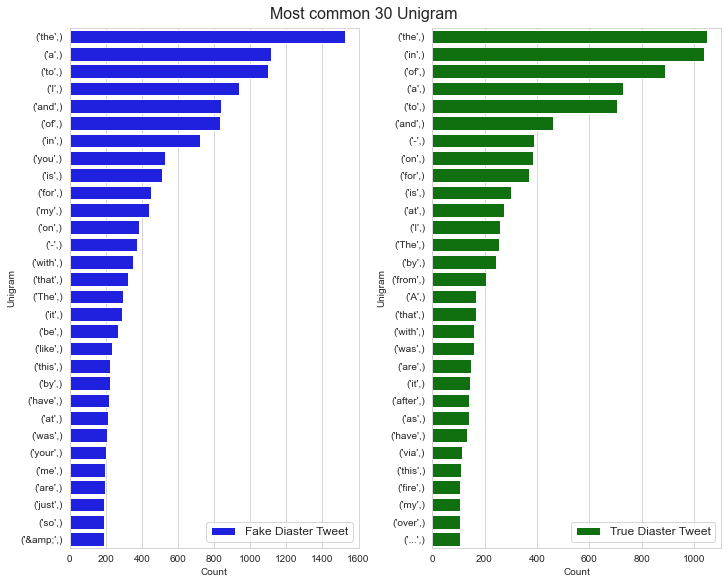

In [188]:
#unigram
#========
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8), constrained_layout=True)
fig.suptitle('Most common 30 Unigram', fontsize=16)
sns.barplot(y='Unigram', x='Count', data=unigram_0.head(30), color='blue', ax=ax[0], label='Fake Diaster Tweet')
sns.barplot(y='Unigram', x='Count', data=unigram_1.head(30), color='green', ax=ax[1], label='True Diaster Tweet')
ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
plt.show()

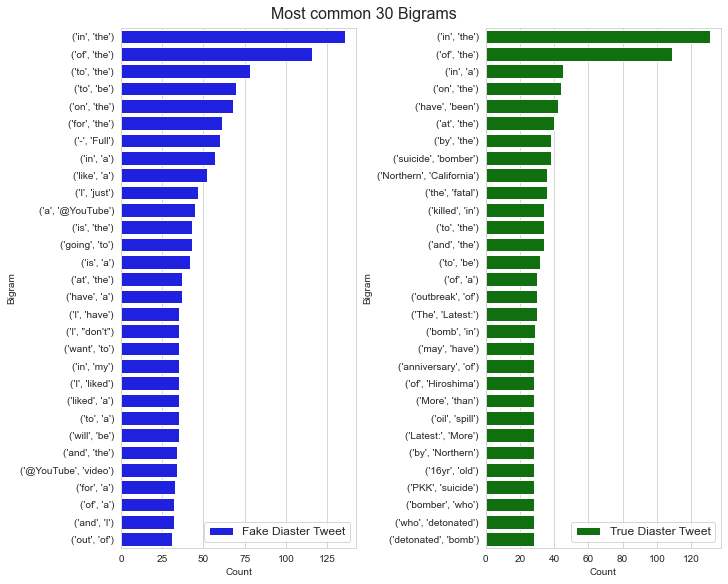

In [187]:
#bigram
#======
bigram_0 = get_ngram_dataframe(2, df_train[train_filter0], 'Bigram')
bigram_1 = get_ngram_dataframe(2, df_train[train_filter1], 'Bigram')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), constrained_layout=True)
fig.suptitle('Most common 30 Bigrams', fontsize=16)
sns.barplot(y='Bigram', x='Count', data=bigram_0.head(30), color='blue', ax=ax[0], label='Fake Diaster Tweet')
sns.barplot(y='Bigram', x='Count', data=bigram_1.head(30), color='green', ax=ax[1], label='True Diaster Tweet')
ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
plt.show()

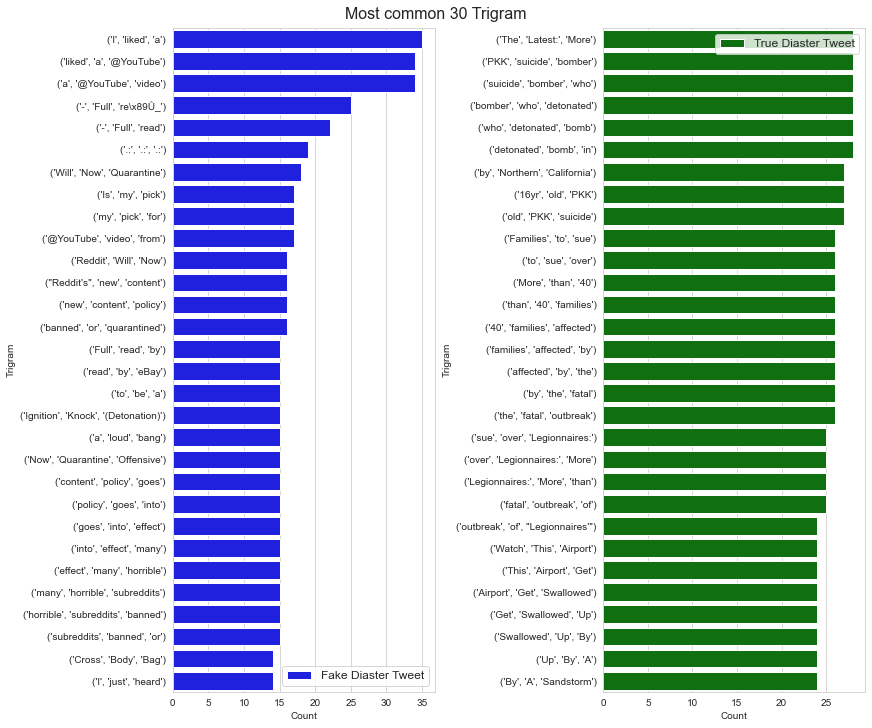

In [192]:
# Trigram
#==========
trigram_0 = get_ngram_dataframe(3, df_train[train_filter0], 'Trigram')
trigram_1 = get_ngram_dataframe(3, df_train[train_filter1], 'Trigram')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,10), constrained_layout=True)
fig.suptitle('Most common 30 Trigram', fontsize=16)
sns.barplot(y='Trigram', x='Count', data=trigram_0.head(30), color='blue', ax=ax[0], label='Fake Diaster Tweet')
sns.barplot(y='Trigram', x='Count', data=trigram_1.head(30), color='green', ax=ax[1], label='True Diaster Tweet')
ax[0].legend(fontsize=12)
ax[1].legend(fontsize=12)
plt.show()

In [205]:
# We extract the file 'glove.6B.100d.txt', from the link https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt?select=glove.6B.100d.txt
def load_embed(file): #function to read the file 
    '''
    Module create the Glove embedding from the Glove text file.
    
    Input - Embedding file.
    
    Returns - Embedding Dictonary
    '''
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float32')
    
    if file == '../input/embeddings/wiki-news-300d-1M/wiki-news-300d-1M.vec':
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file) if len(o)>100)
    else:
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
    return embeddings_index

#------------------------------------------------------------------------------------
glove = 'glove.6B.100d.txt'
print("Extracting GloVe embedding")
embed_glove = load_embed(glove)

Extracting GloVe embedding


In [206]:
def build_vocab(texts):
    '''
    Creates vocabulary
    
    Input - Text
    
    Returns - vocab Dictonary
    '''
    sentences = texts.apply(lambda x: x.split()).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word.lower()] += 1
            except KeyError:
                vocab[word.lower()] = 1
    return vocab

In [207]:
import operator
def check_coverage(vocab, embeddings_index):
    '''
    To check coverage of the data vocabulary and embedding index
    
    Input:
        vocab - Data Vocabulary
        embeddings_index - Already trained embedding index
    
    Returns - Out of vocabulary dictionary and prints the coverge.
    '''
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.3%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.3%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))
    unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]
    
    return unknown_words

In [209]:
# Lets check the embedding coverage before cleaning of data.
vocab_train = build_vocab(df_train['text'])
print("Glove : Train")
oov_glove_train = check_coverage(vocab_train, embed_glove)

vocab_test = build_vocab(df_test['text'])
print("Glove : Test")
oov_glove_test = check_coverage(vocab_test, embed_glove)



Glove : Train
Found embeddings for 39.796% of vocab
Found embeddings for  78.638% of all text
Glove : Test
Found embeddings for 46.021% of vocab
Found embeddings for  78.113% of all text


#### Part 2-  Cleaning of the data tram and data test

In [218]:
# Some of the dictionnary is picked from line, other keywords are from the data that we have

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because",
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not",
                       "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
                       "he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", 
                       "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have",
                       "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                       "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am",
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have",
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us",
                       "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have",
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
                       "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is",
                       "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                       "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                       "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have",
                       "you're": "you are", "you've": "you have" }

In [221]:
# transform to lower form
df_train["text"] = df_train["text"].apply(lambda x: x.lower())
df_test["text"] = df_test["text"].apply(lambda x: x.lower())

#-------------------------------------------------------------------
# apply the mapping with the dictionnary set below
df_train["text"] =df_train["text"].apply(lambda x : " ".join([contraction_mapping[word].lower() if word in contraction_mapping.keys() else word.lower() for word in x.split(" ")]))
df_test["text"] = df_test["text"].apply(lambda x : " ".join([contraction_mapping[word].lower() if word in contraction_mapping.keys() else word.lower() for word in x.split(" ")]))

#-------------------------------------------------------------------
# Check if the mapping worked with the new coverge percentage

vocab_train = build_vocab(df_train["text"])
print("Glove : Train")
oov_glove_train = check_coverage(vocab_train, embed_glove)

vocab_test = build_vocab(df_train["text"])
print("Glove : Test")
oov_glove_test = check_coverage(vocab_test, embed_glove)



Glove : Train
Found embeddings for 39.850% of vocab
Found embeddings for  80.015% of all text
Glove : Test
Found embeddings for 39.850% of vocab
Found embeddings for  80.015% of all text


* One can use now one of the the function that we have set at the beginning of the project in order to preprocess the data and clean it more efficiently. 

#### Part 3-  Training a simple linear model using the embeddings as your inputs using sklearn.linear_model.SGDClassifier.

* We are going to use the data that we have cleaned previously 

In [275]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


#-------------------------------------------------------------------------------
# time is off!




## TASK 4 - Recommendations to the clients

Create a final plot(s) of the relevant performance metrics from each experiment.\

1-Your job is to present this to each client, providing a recommendation to the clients,
taking into consideration all of the clients wants and needs.\

2-  Explain your decisions.

* the plots and the discussions where created under each part of the project.

## TASK 5 - Submit exam to Statistics Canada

In [ ]:
See instructions under “What to Submit” on the first page of this document.
Submit your exam at statcan.fellowship-fellowship.statcan@statcan.gc.ca
Include:
- all code used to complete the task and other required auxiliary code
- share the link to your public Git repository so we can evaluate the code, figures
and documentation

* the project report was submitted as indicated.